In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pathlib import Path
import torch
from sklearn import metrics
from torchvision import models
from torchvision.models import MobileNet_V3_Small_Weights
from torch import nn
from model_utils import eval_per_class


## Custom Functions

In [ ]:
def csv_dirs(data_folder:str)->list:
    dirs = glob.glob(f"{Path(data_folder)/'**'}", recursive=True)
    csv_dirs = []
    for path in dirs:
        if ".csv" in path:
            csv_dirs.append(path)
    return csv_dirs


def plot_dataframe(df: pd.DataFrame, title: str = ""):
    epochs = df["Epoch"]
    acc = df["Accuracy"]
    loss = df["Average_loss"]
    plt.figure(figsize=(20, 20))
    plt.subplot(2, 1, 1)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.plot(epochs, acc)
    ymin, ymax = acc.min(), acc.max()
    plt.yticks(np.linspace(ymin, ymax, 7))
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.xlabel("Epoch")
    plt.ylabel("Average_loss")
    plt.plot(epochs, loss, color="r", ls="--")
    ymin, ymax = loss.min(), loss.max()
    plt.yticks(np.linspace(ymin, ymax, 7))
    plt.grid()

    plt.tight_layout()
    plt.show()


def label_to_class(values:list[torch.Tensor], labels_map:dict)->list:
    new_values = []
    for v in values:
        new_v = labels_map[v.item()]
        new_values.append(new_v)
    return new_values

def confusion_matrix(title:str, true_values:list, pred_values:list, classes:list):
    cifar_confusion_matrix = metrics.confusion_matrix(
        true_values, pred_values, normalize=None
    )
    cifar_cm_disp = metrics.ConfusionMatrixDisplay(
        cifar_confusion_matrix, display_labels=classes
    )
    cifar_cm_disp.plot()
    plt.title(title)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

def get_batch_size(file_name:str):
    tokens = file_name.split('_')
    batch_size = tokens[3].split(':')[1]
    return int(batch_size)

def perform_eval(model_path:str, classes:list, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = models.mobilenet_v3_small(weights=MobileNet_V3_Small_Weights.DEFAULT).to(device)
    labels_map = {i:clss for i, clss in enumerate(classes, 0)}

    model.classifier[3] = nn.Linear(in_features=1024, out_features=len(classes))
    state_dict = torch.load(model_path, map_location=device)
    model.load_state_dict(state_dict)

    true_values, predicted_values = eval_per_class(data_loader, model, classes)
    true_values = label_to_class(true_values, labels_map)
    predicted_values = label_to_class(predicted_values, labels_map)
    return true_values, predicted_values

## Accuracy and Loss curves over epochs

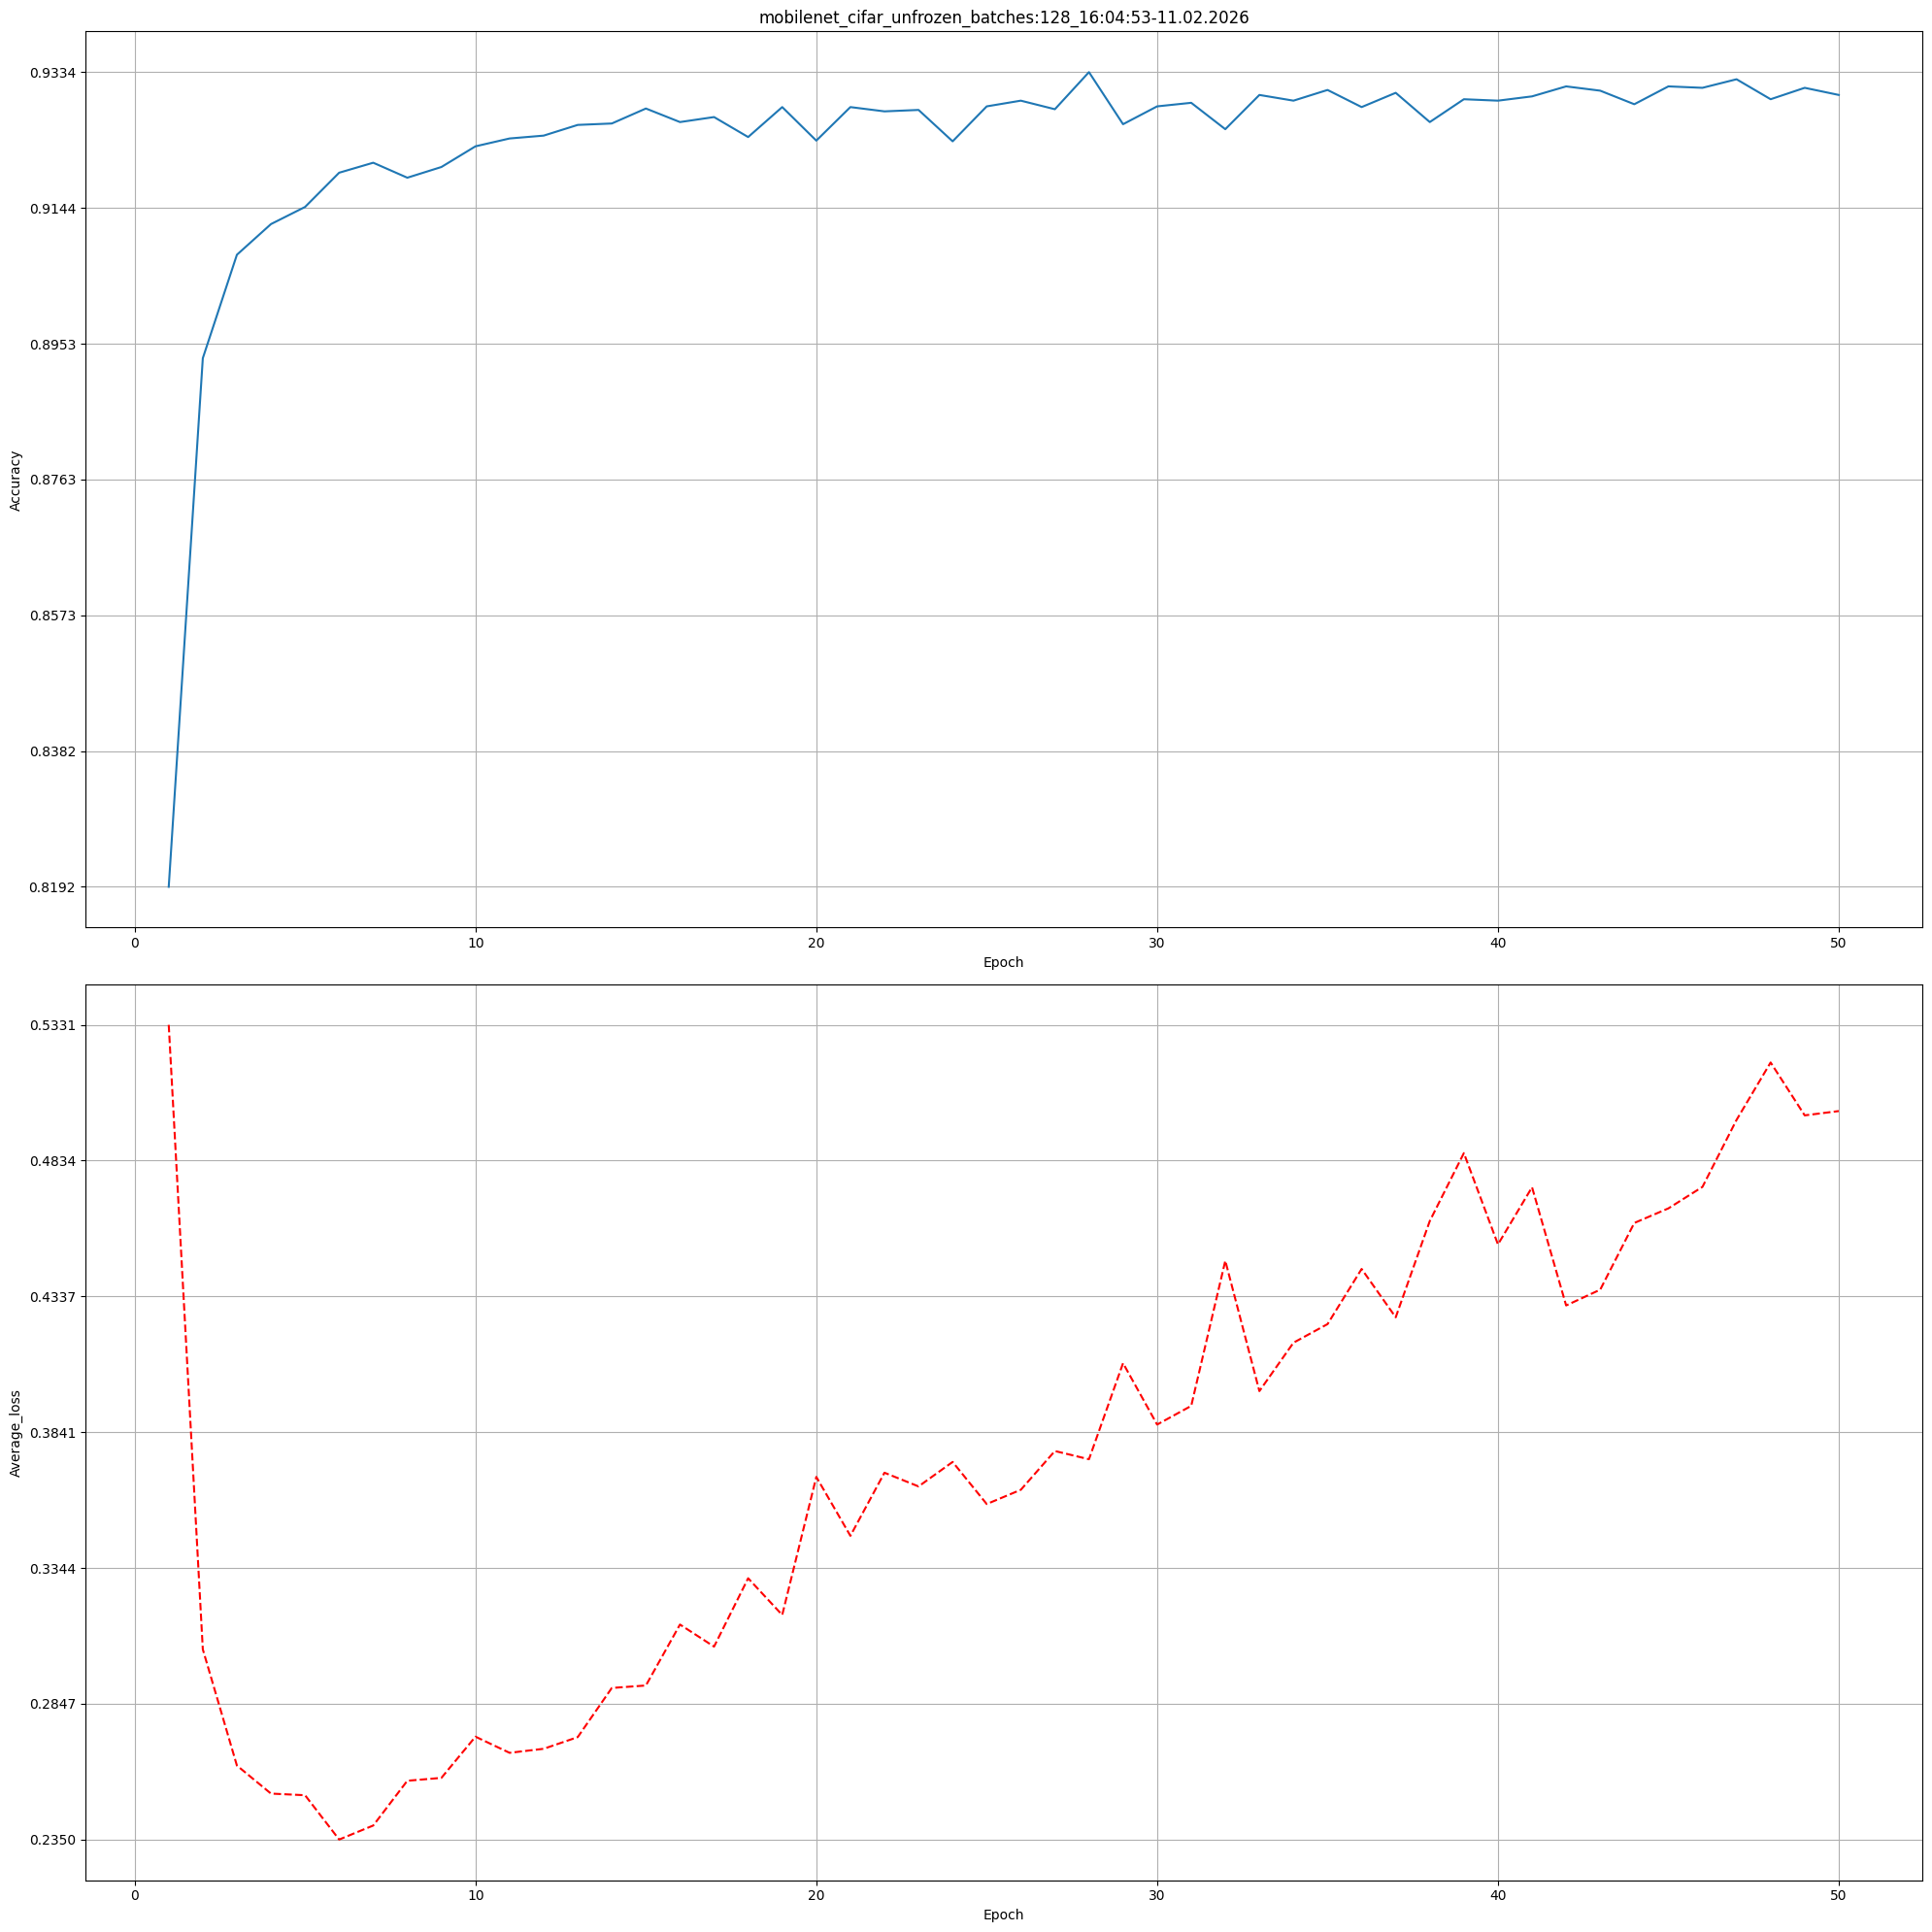

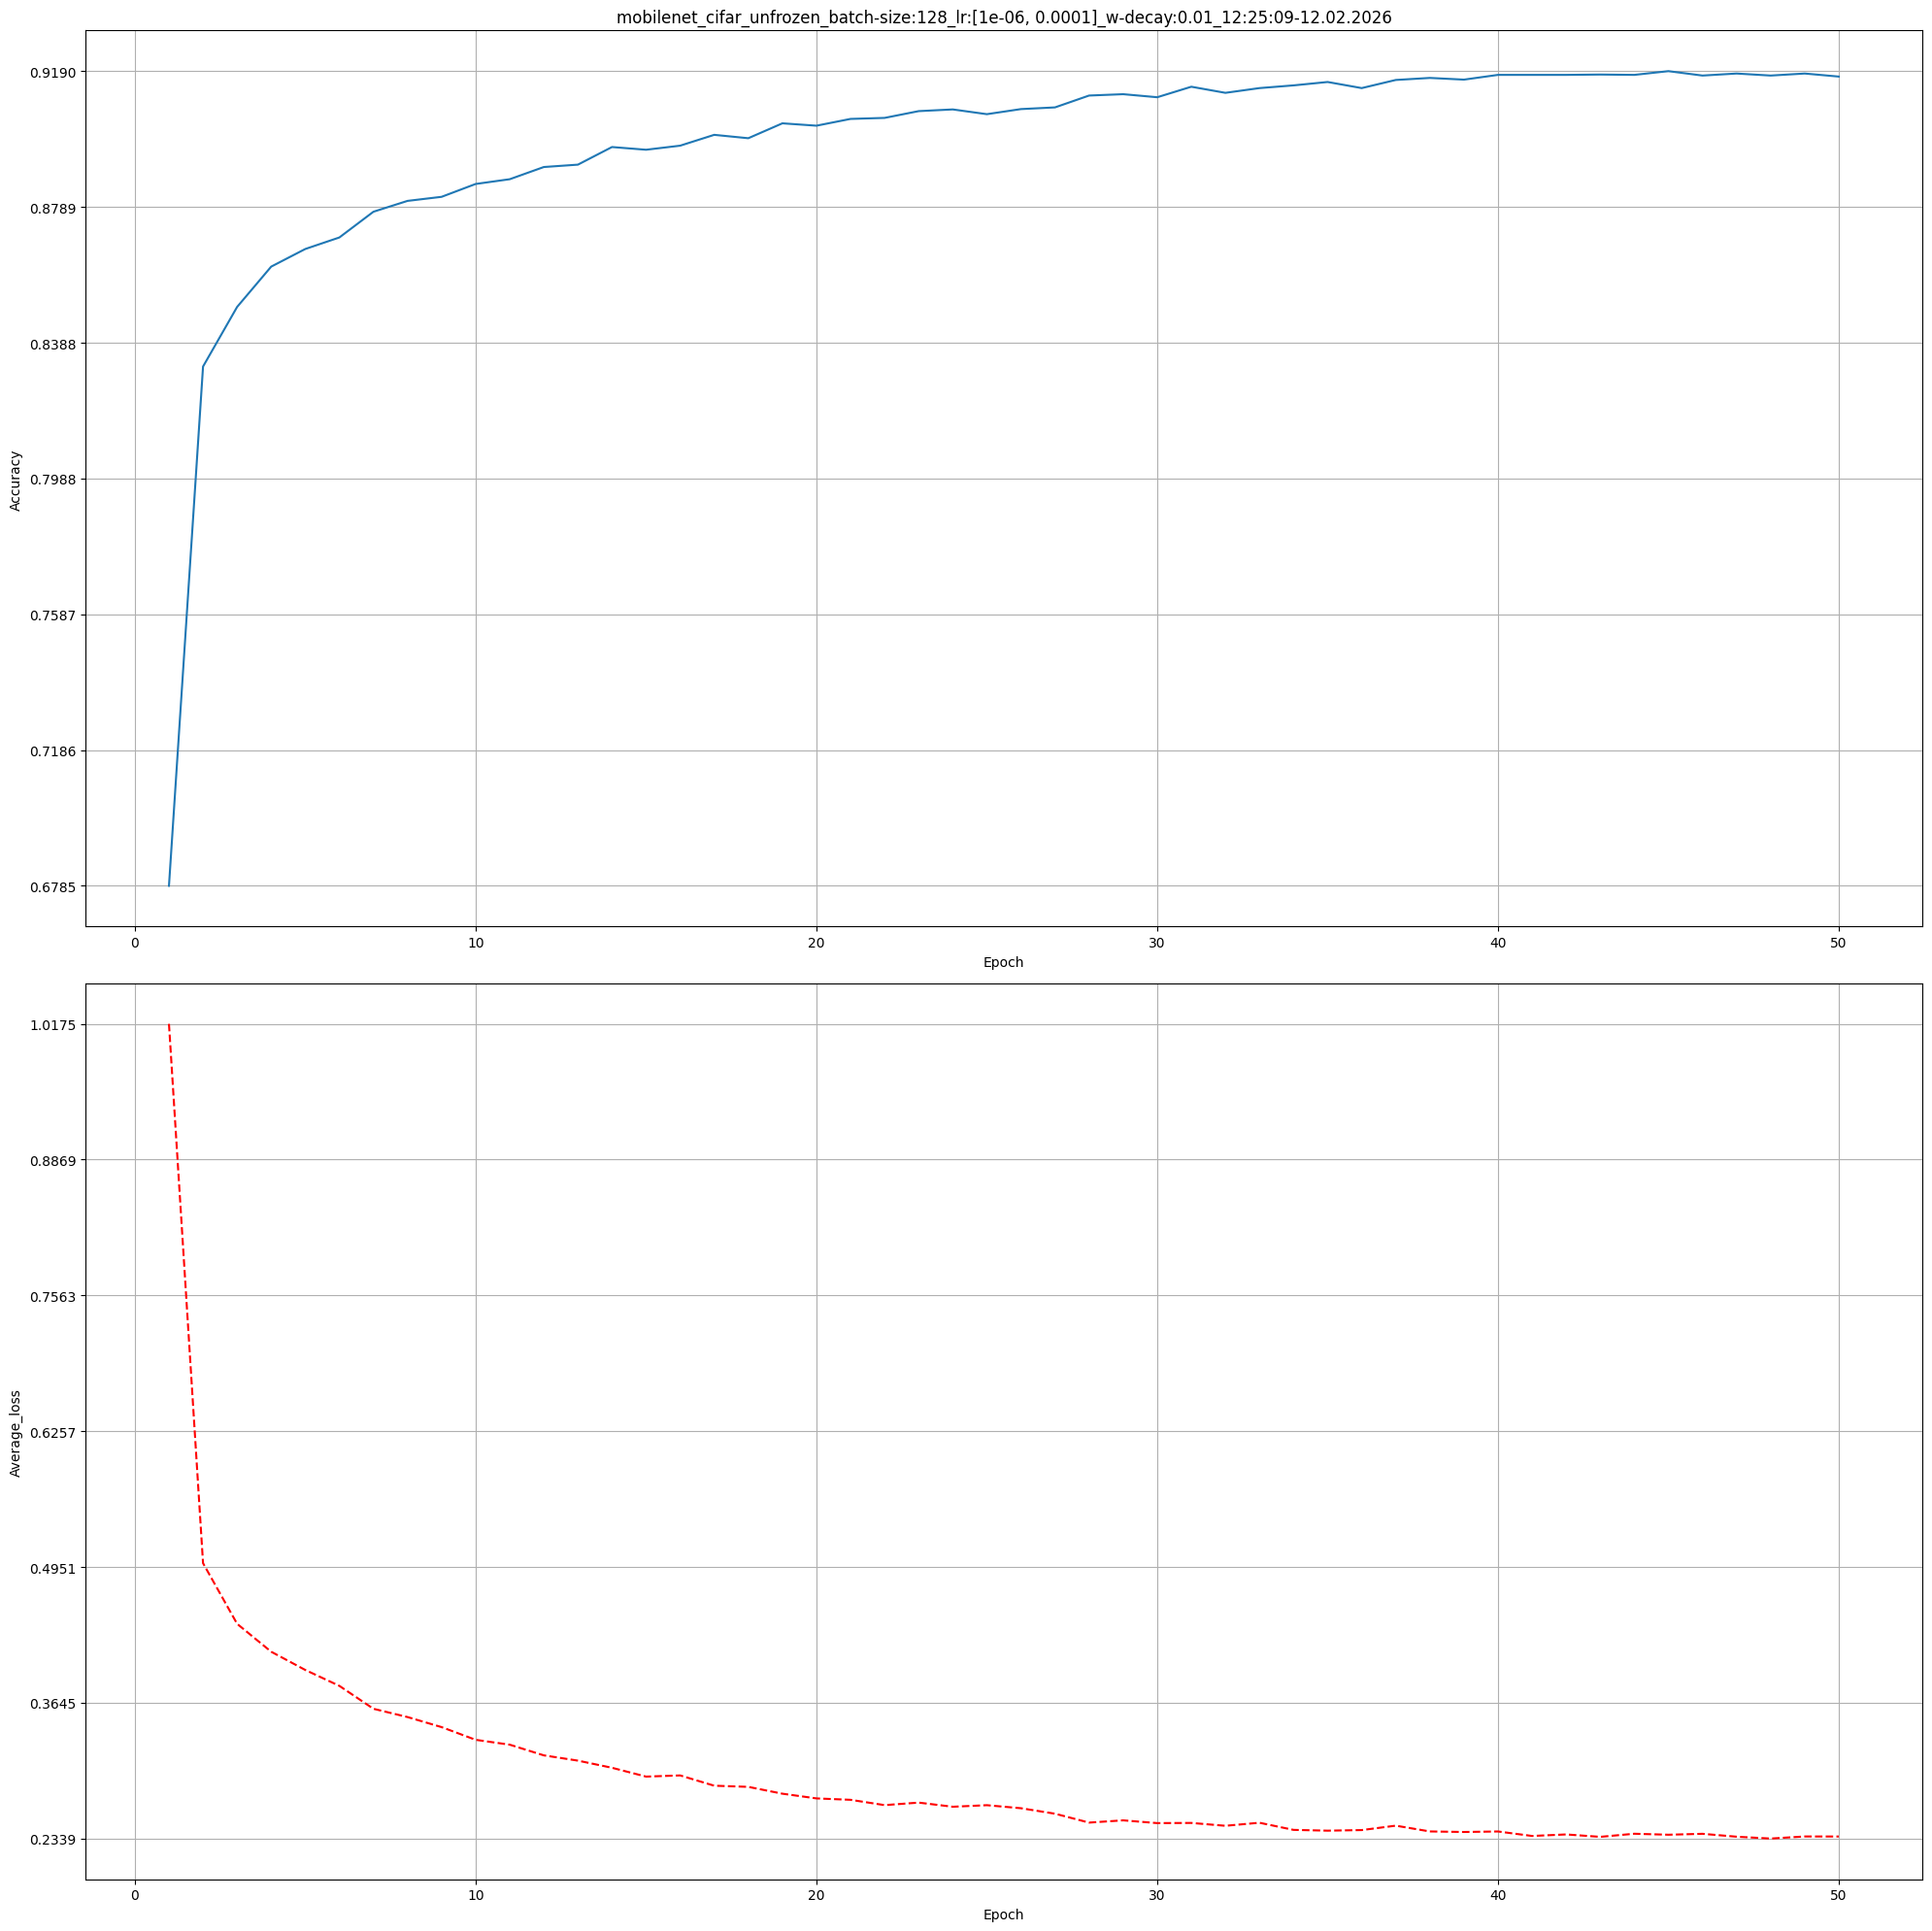

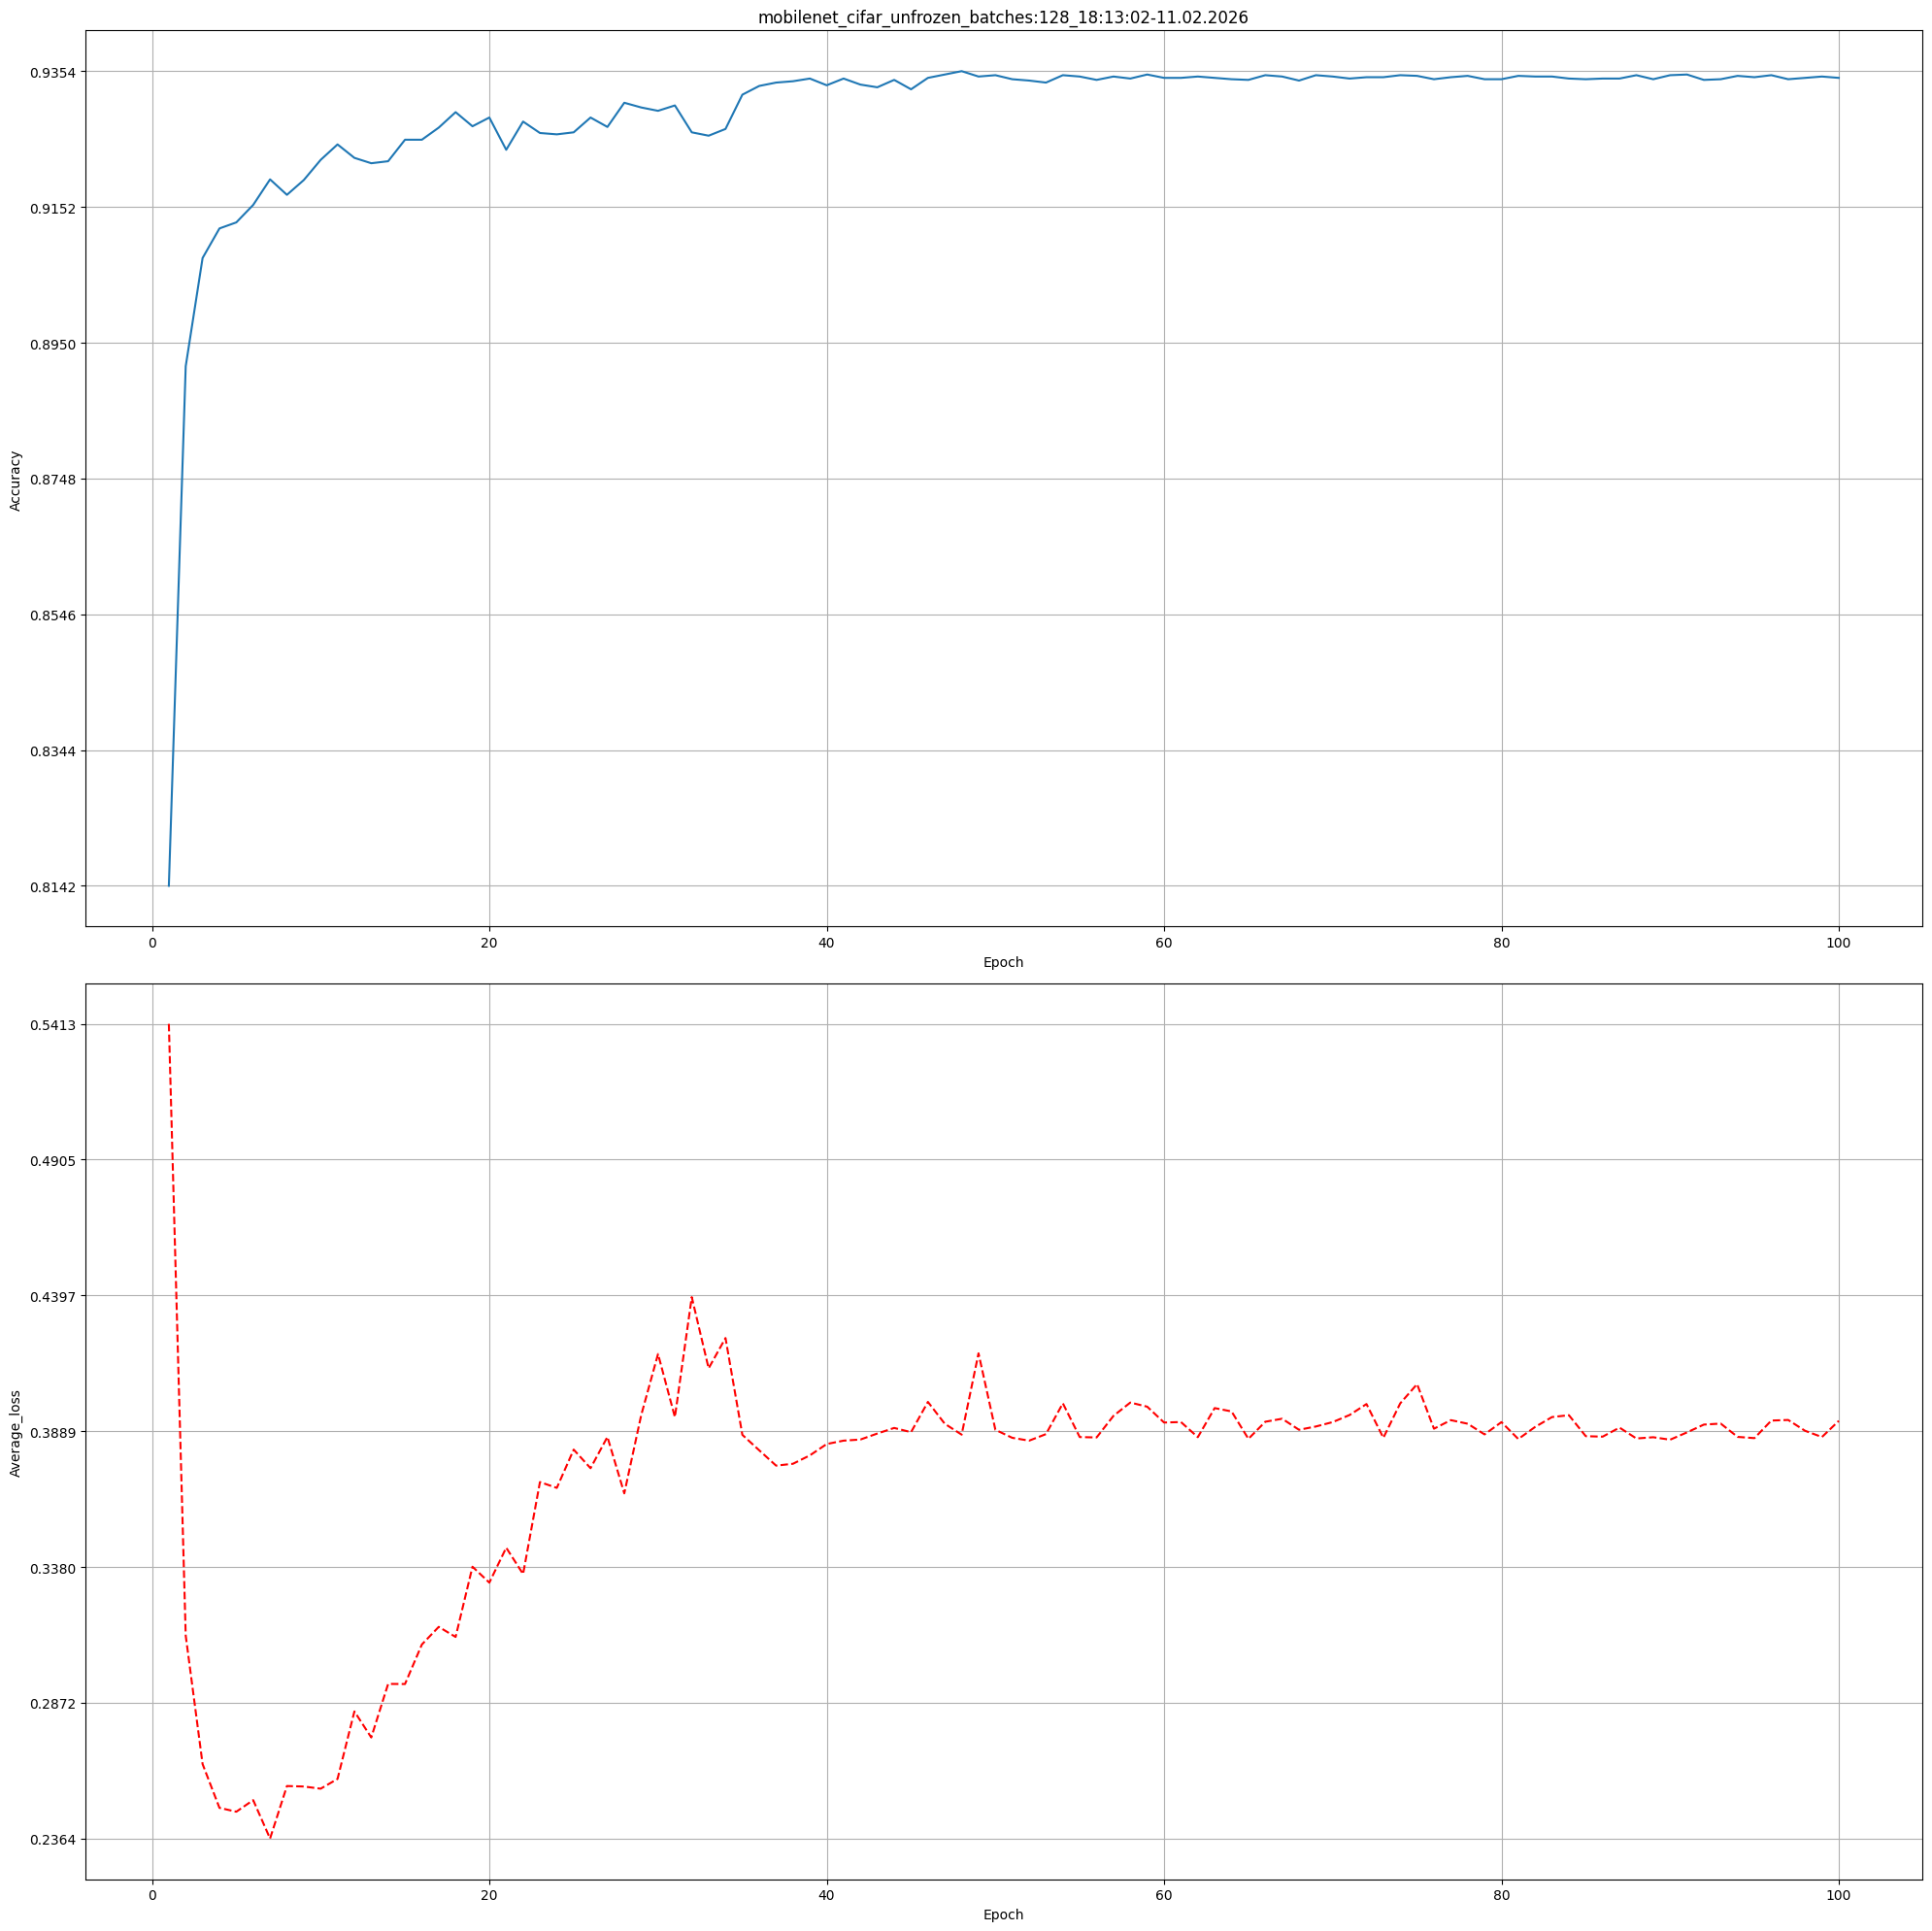

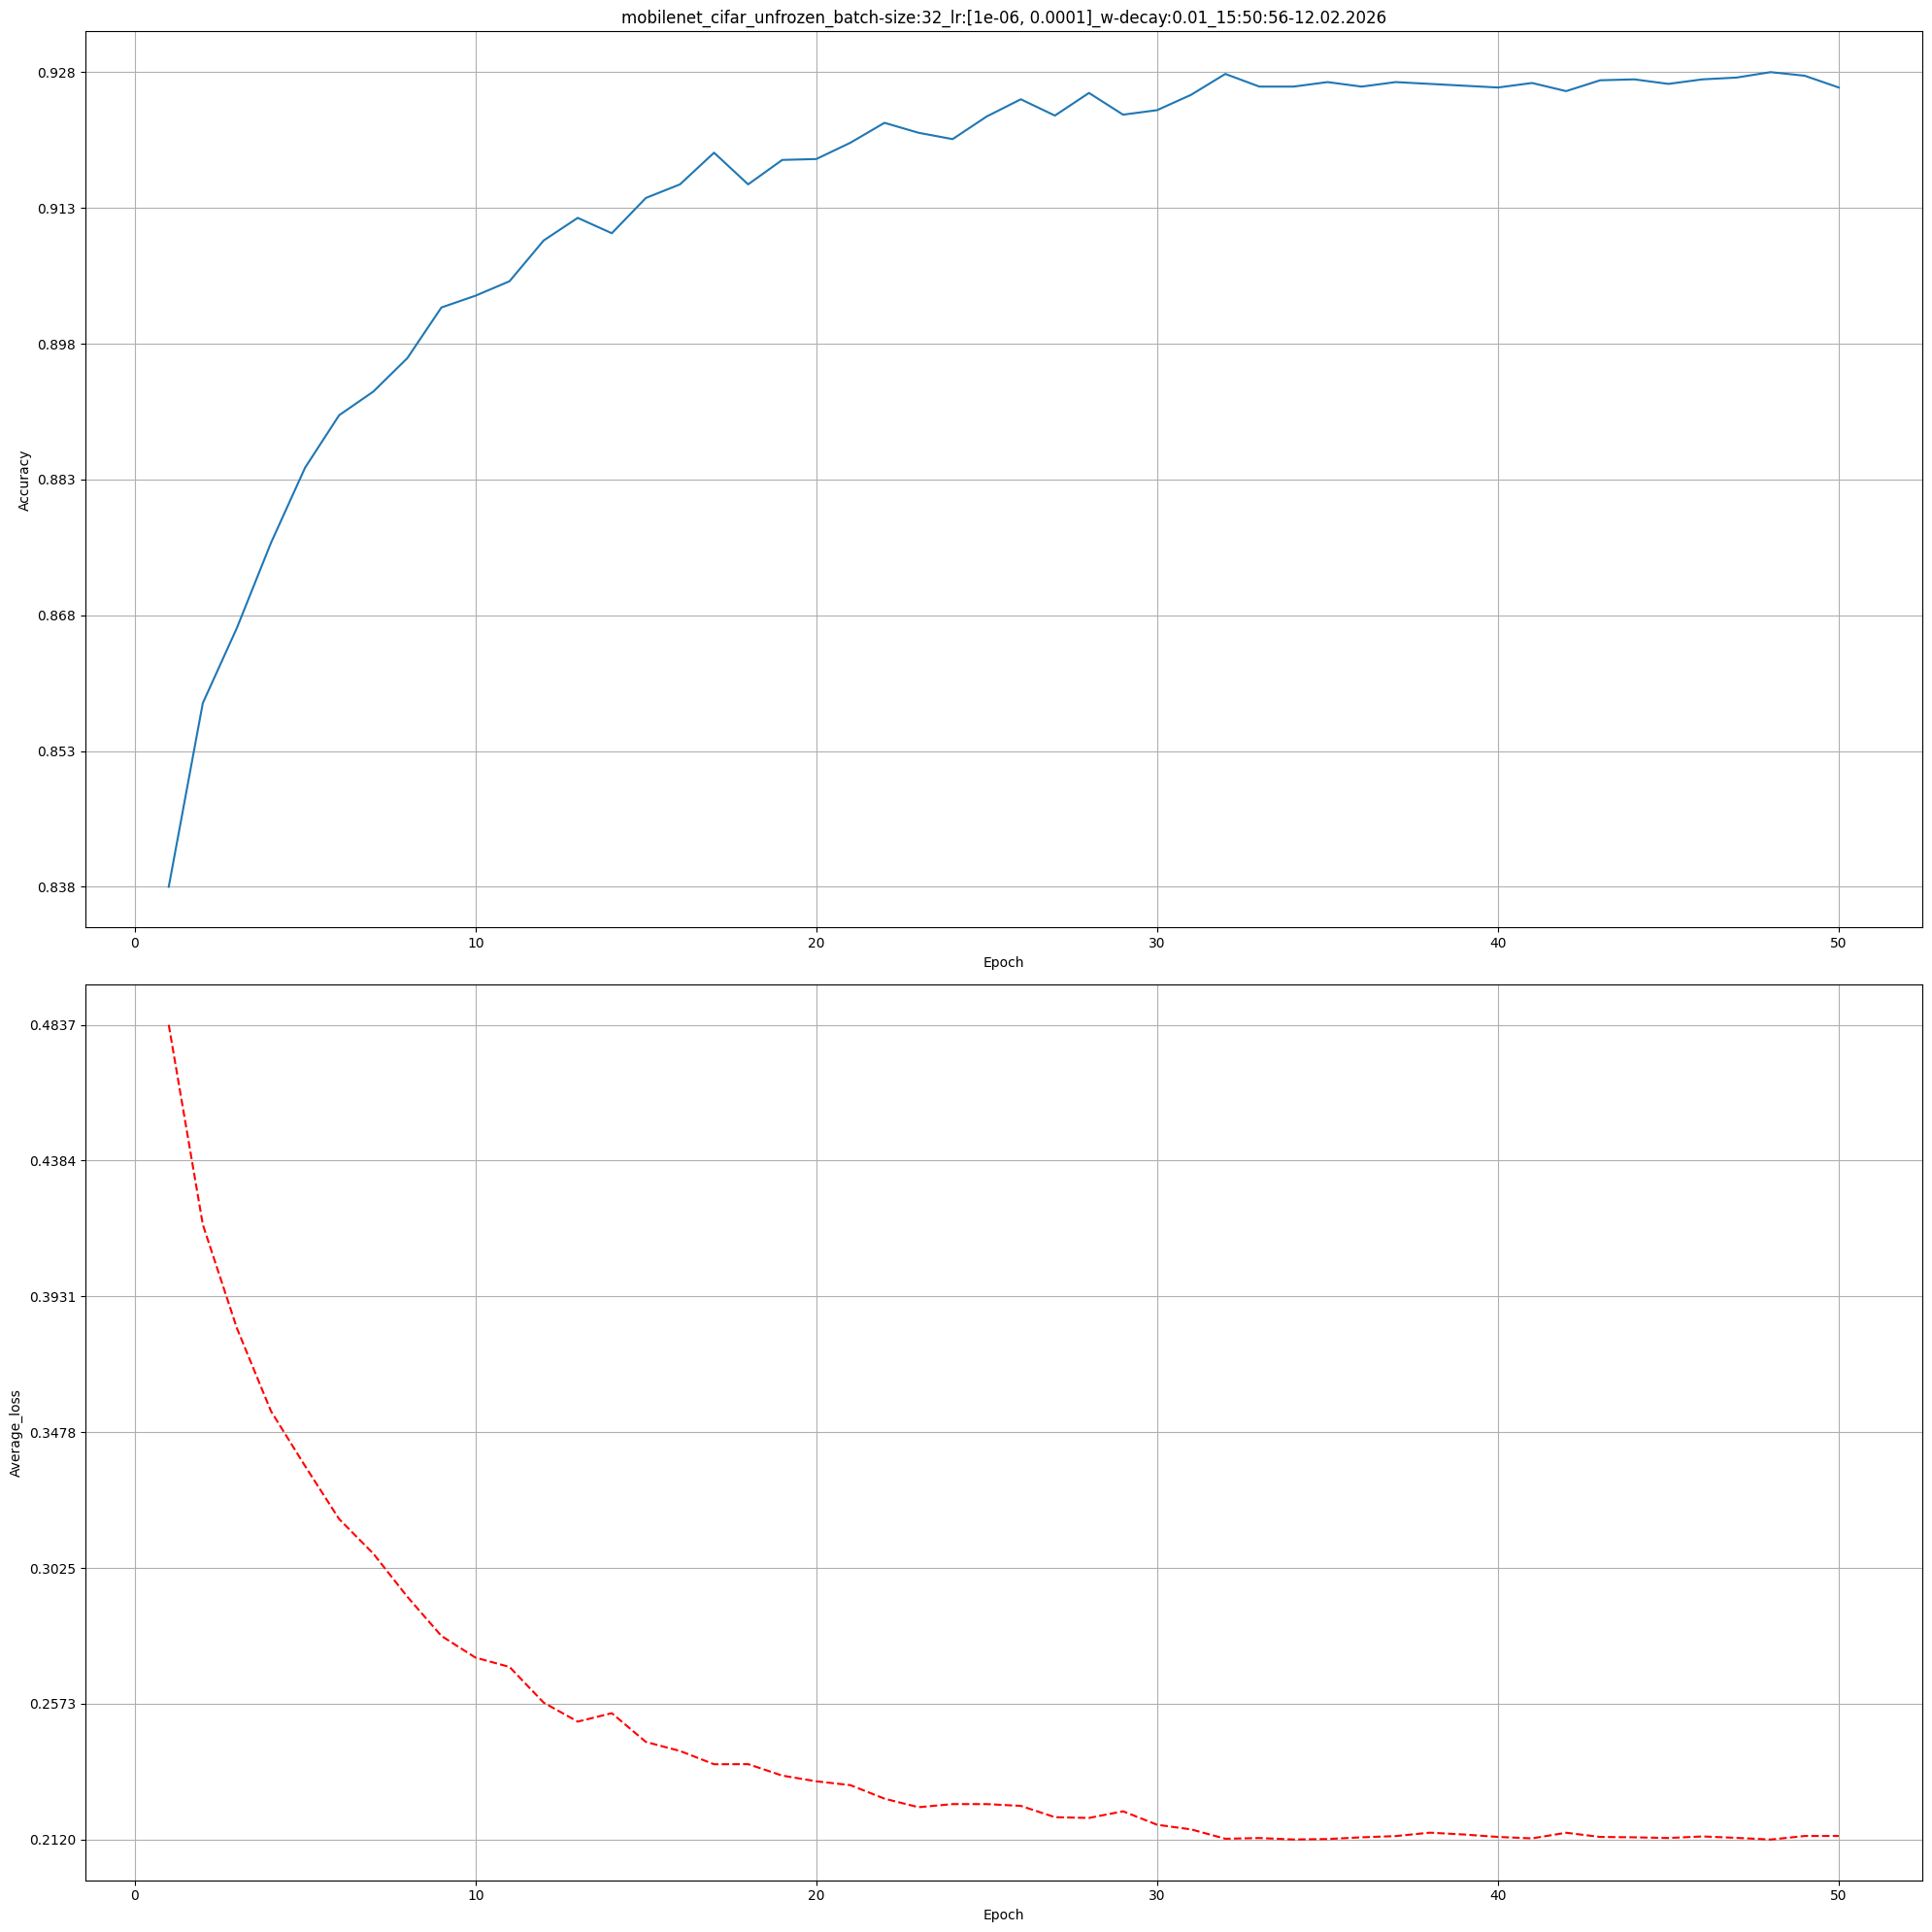

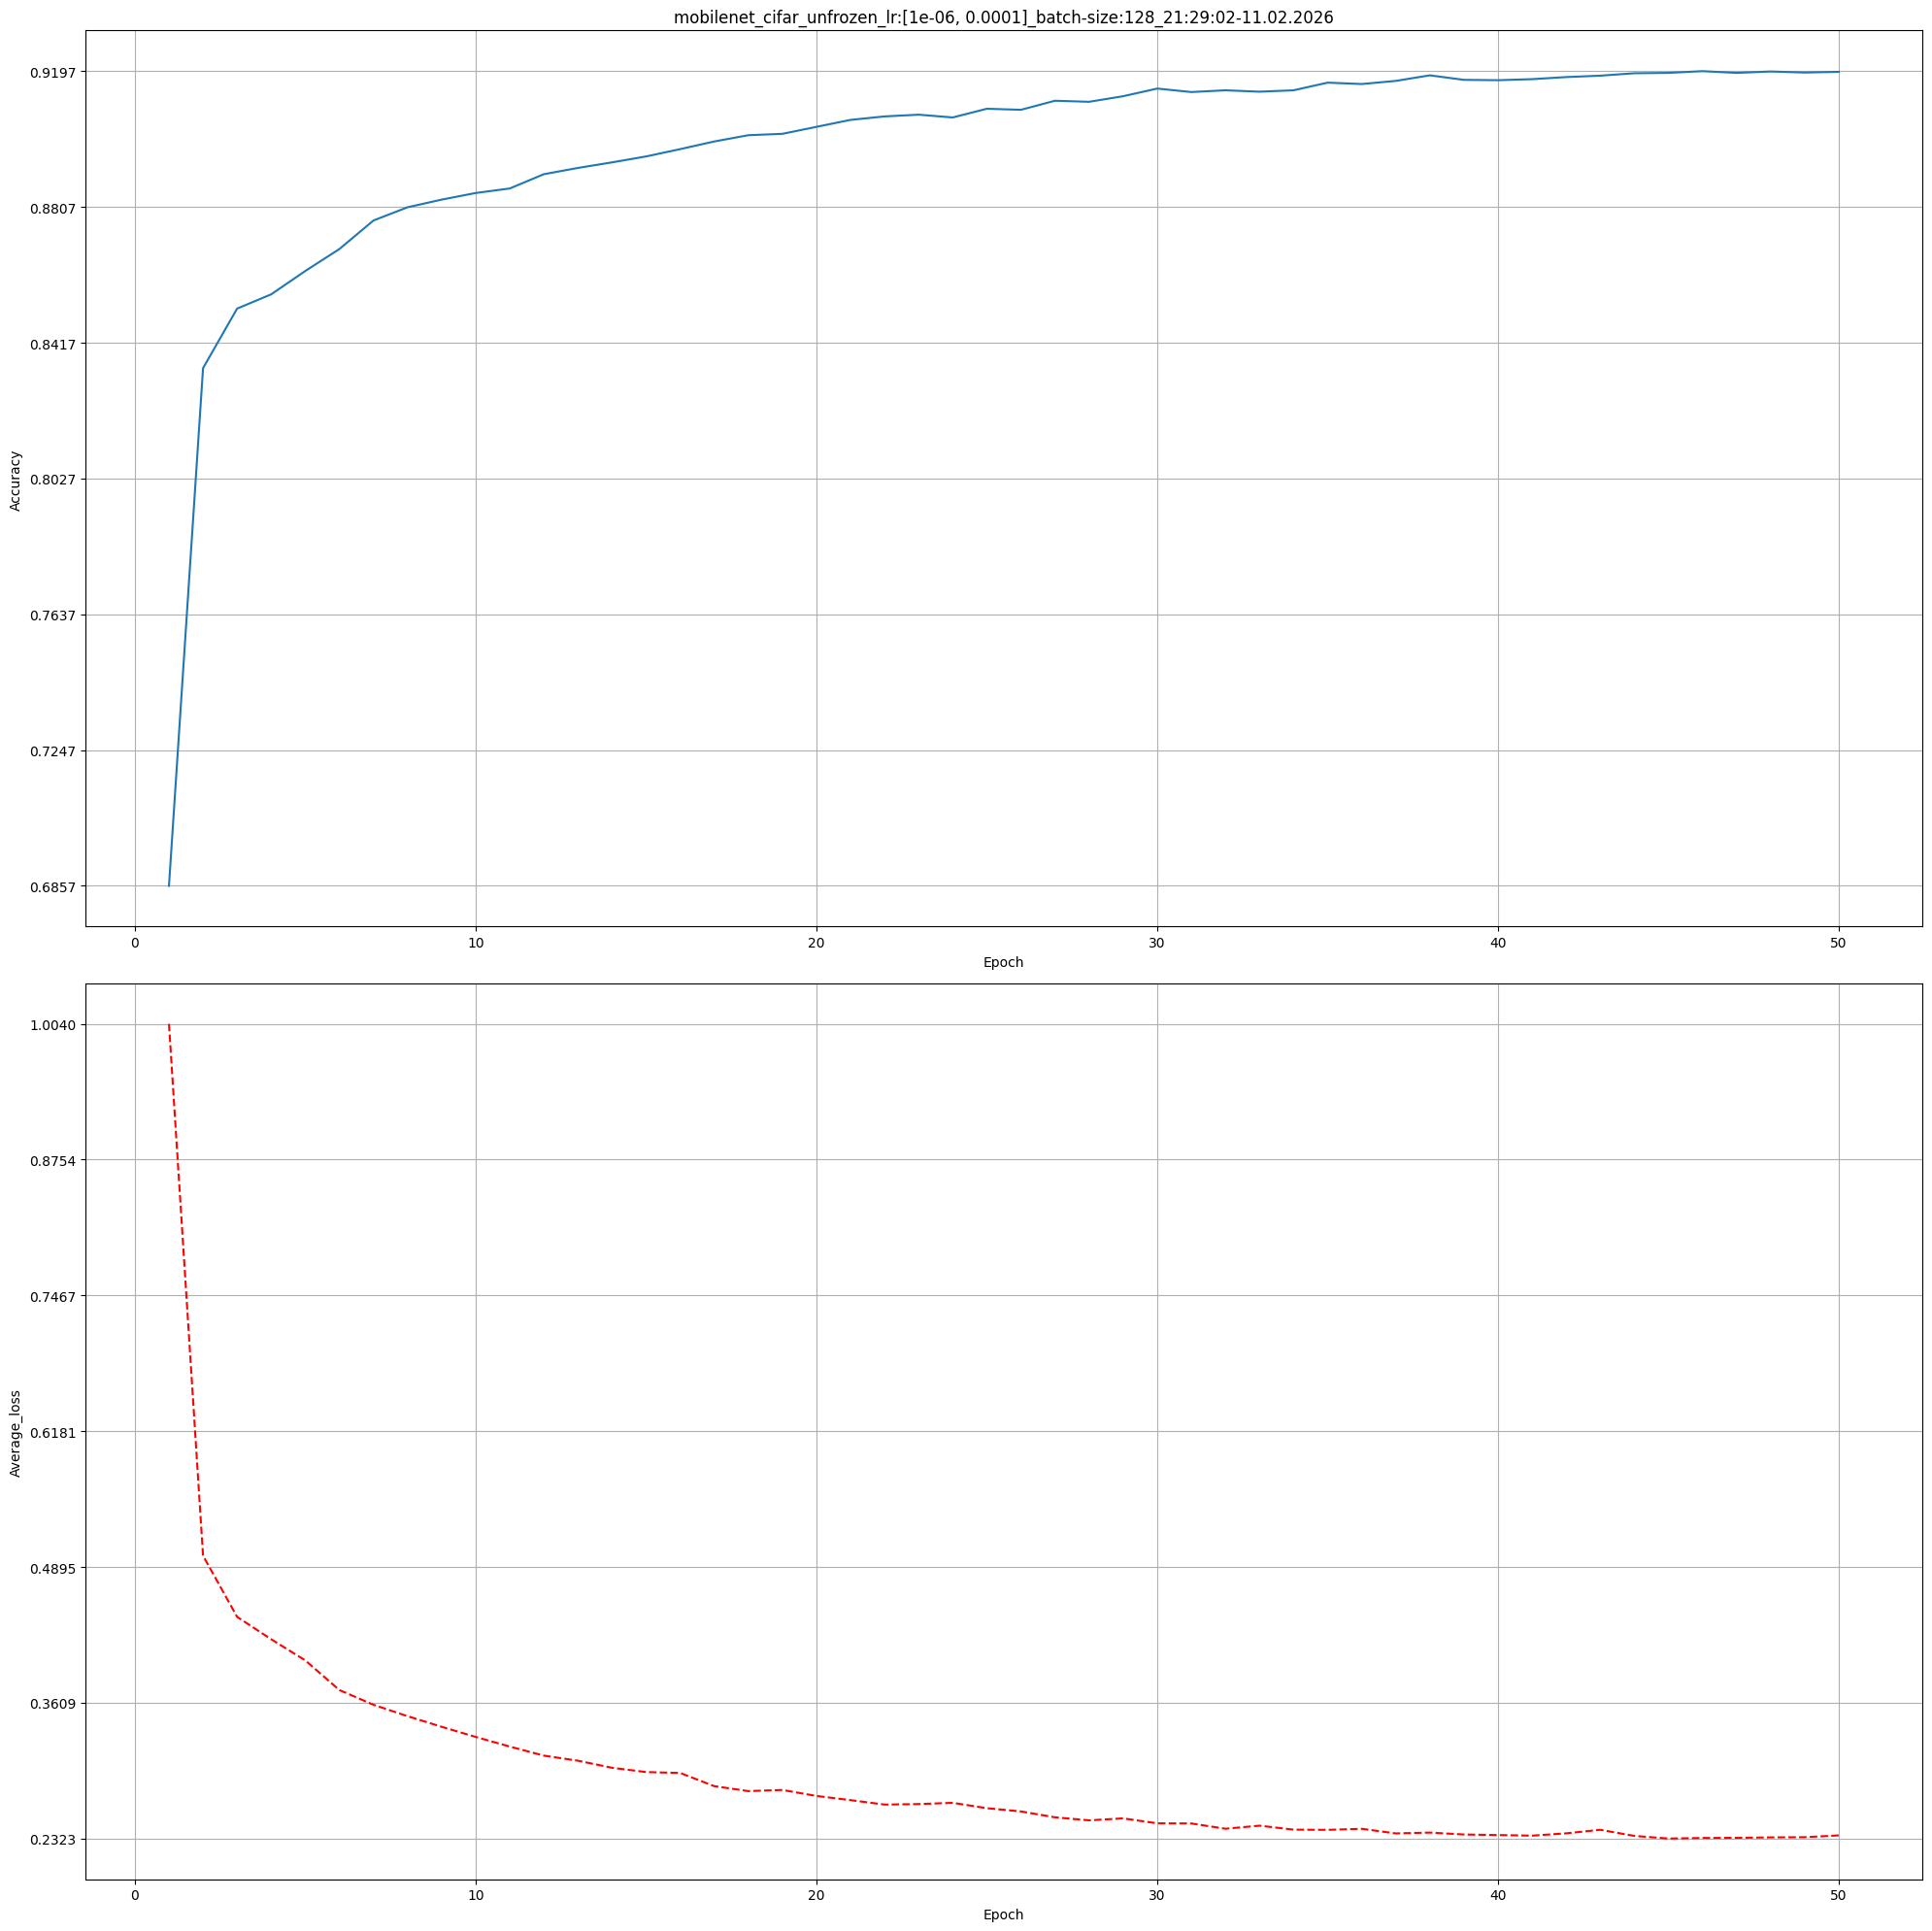

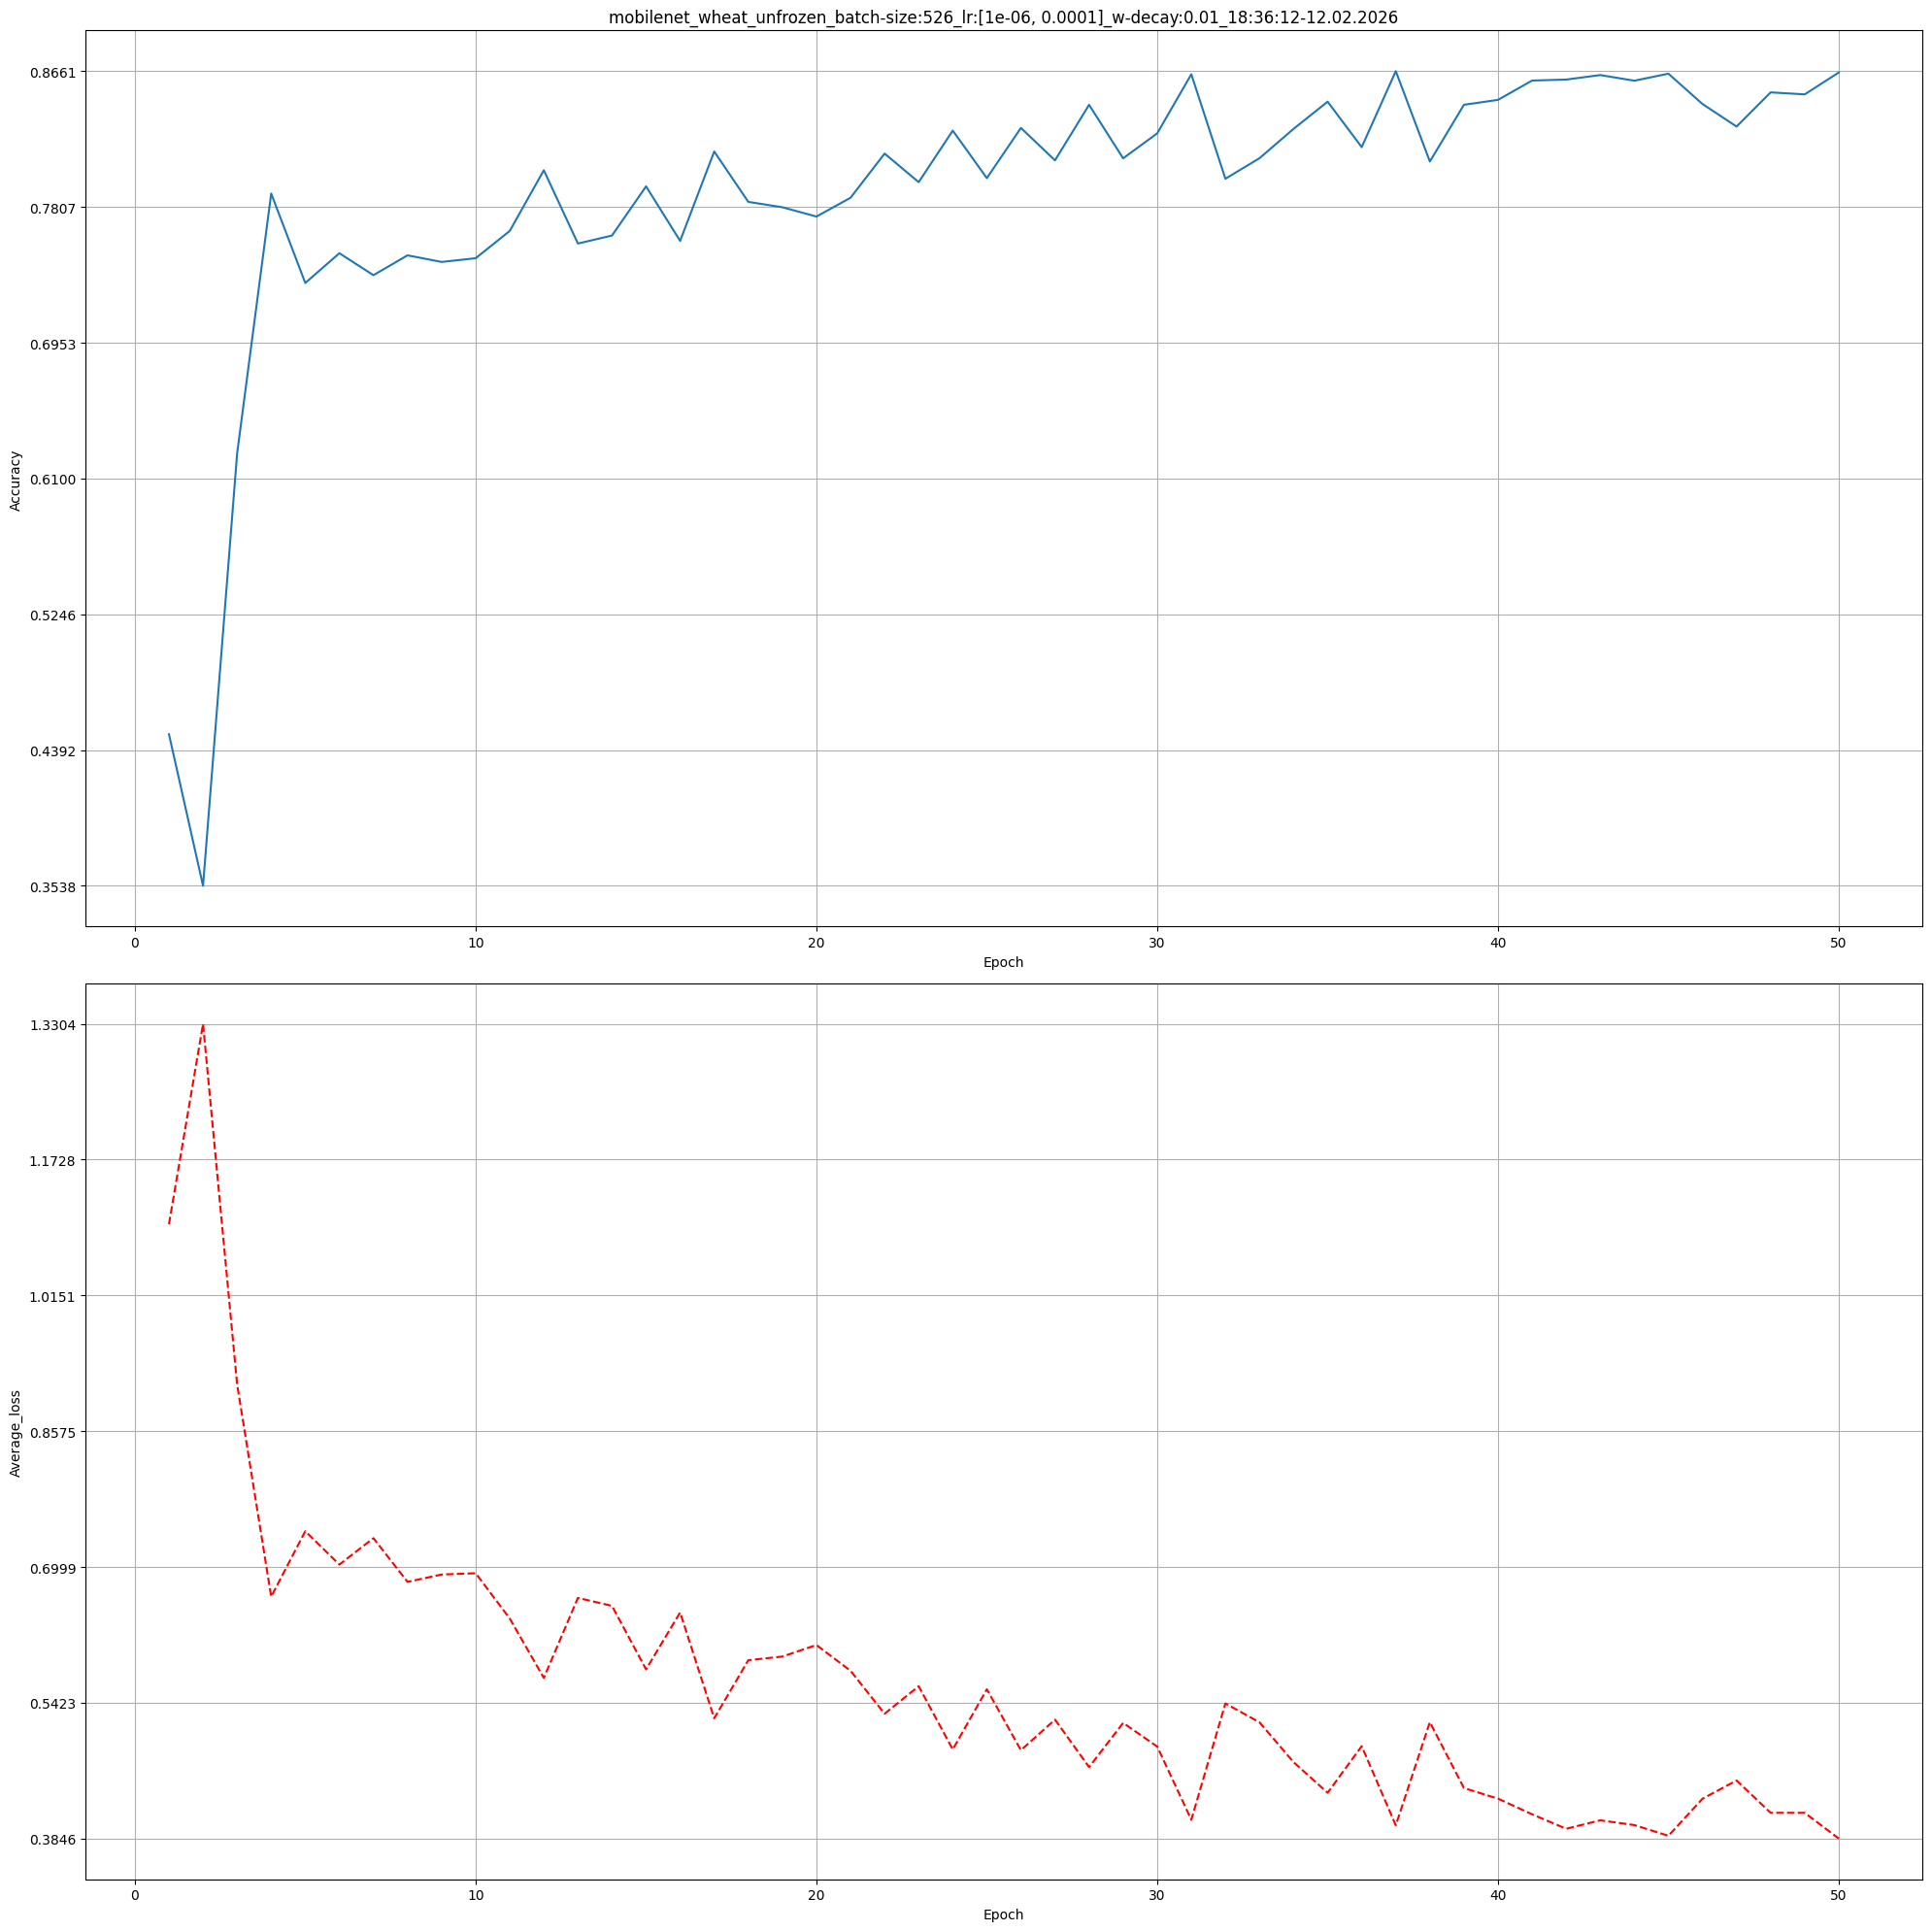

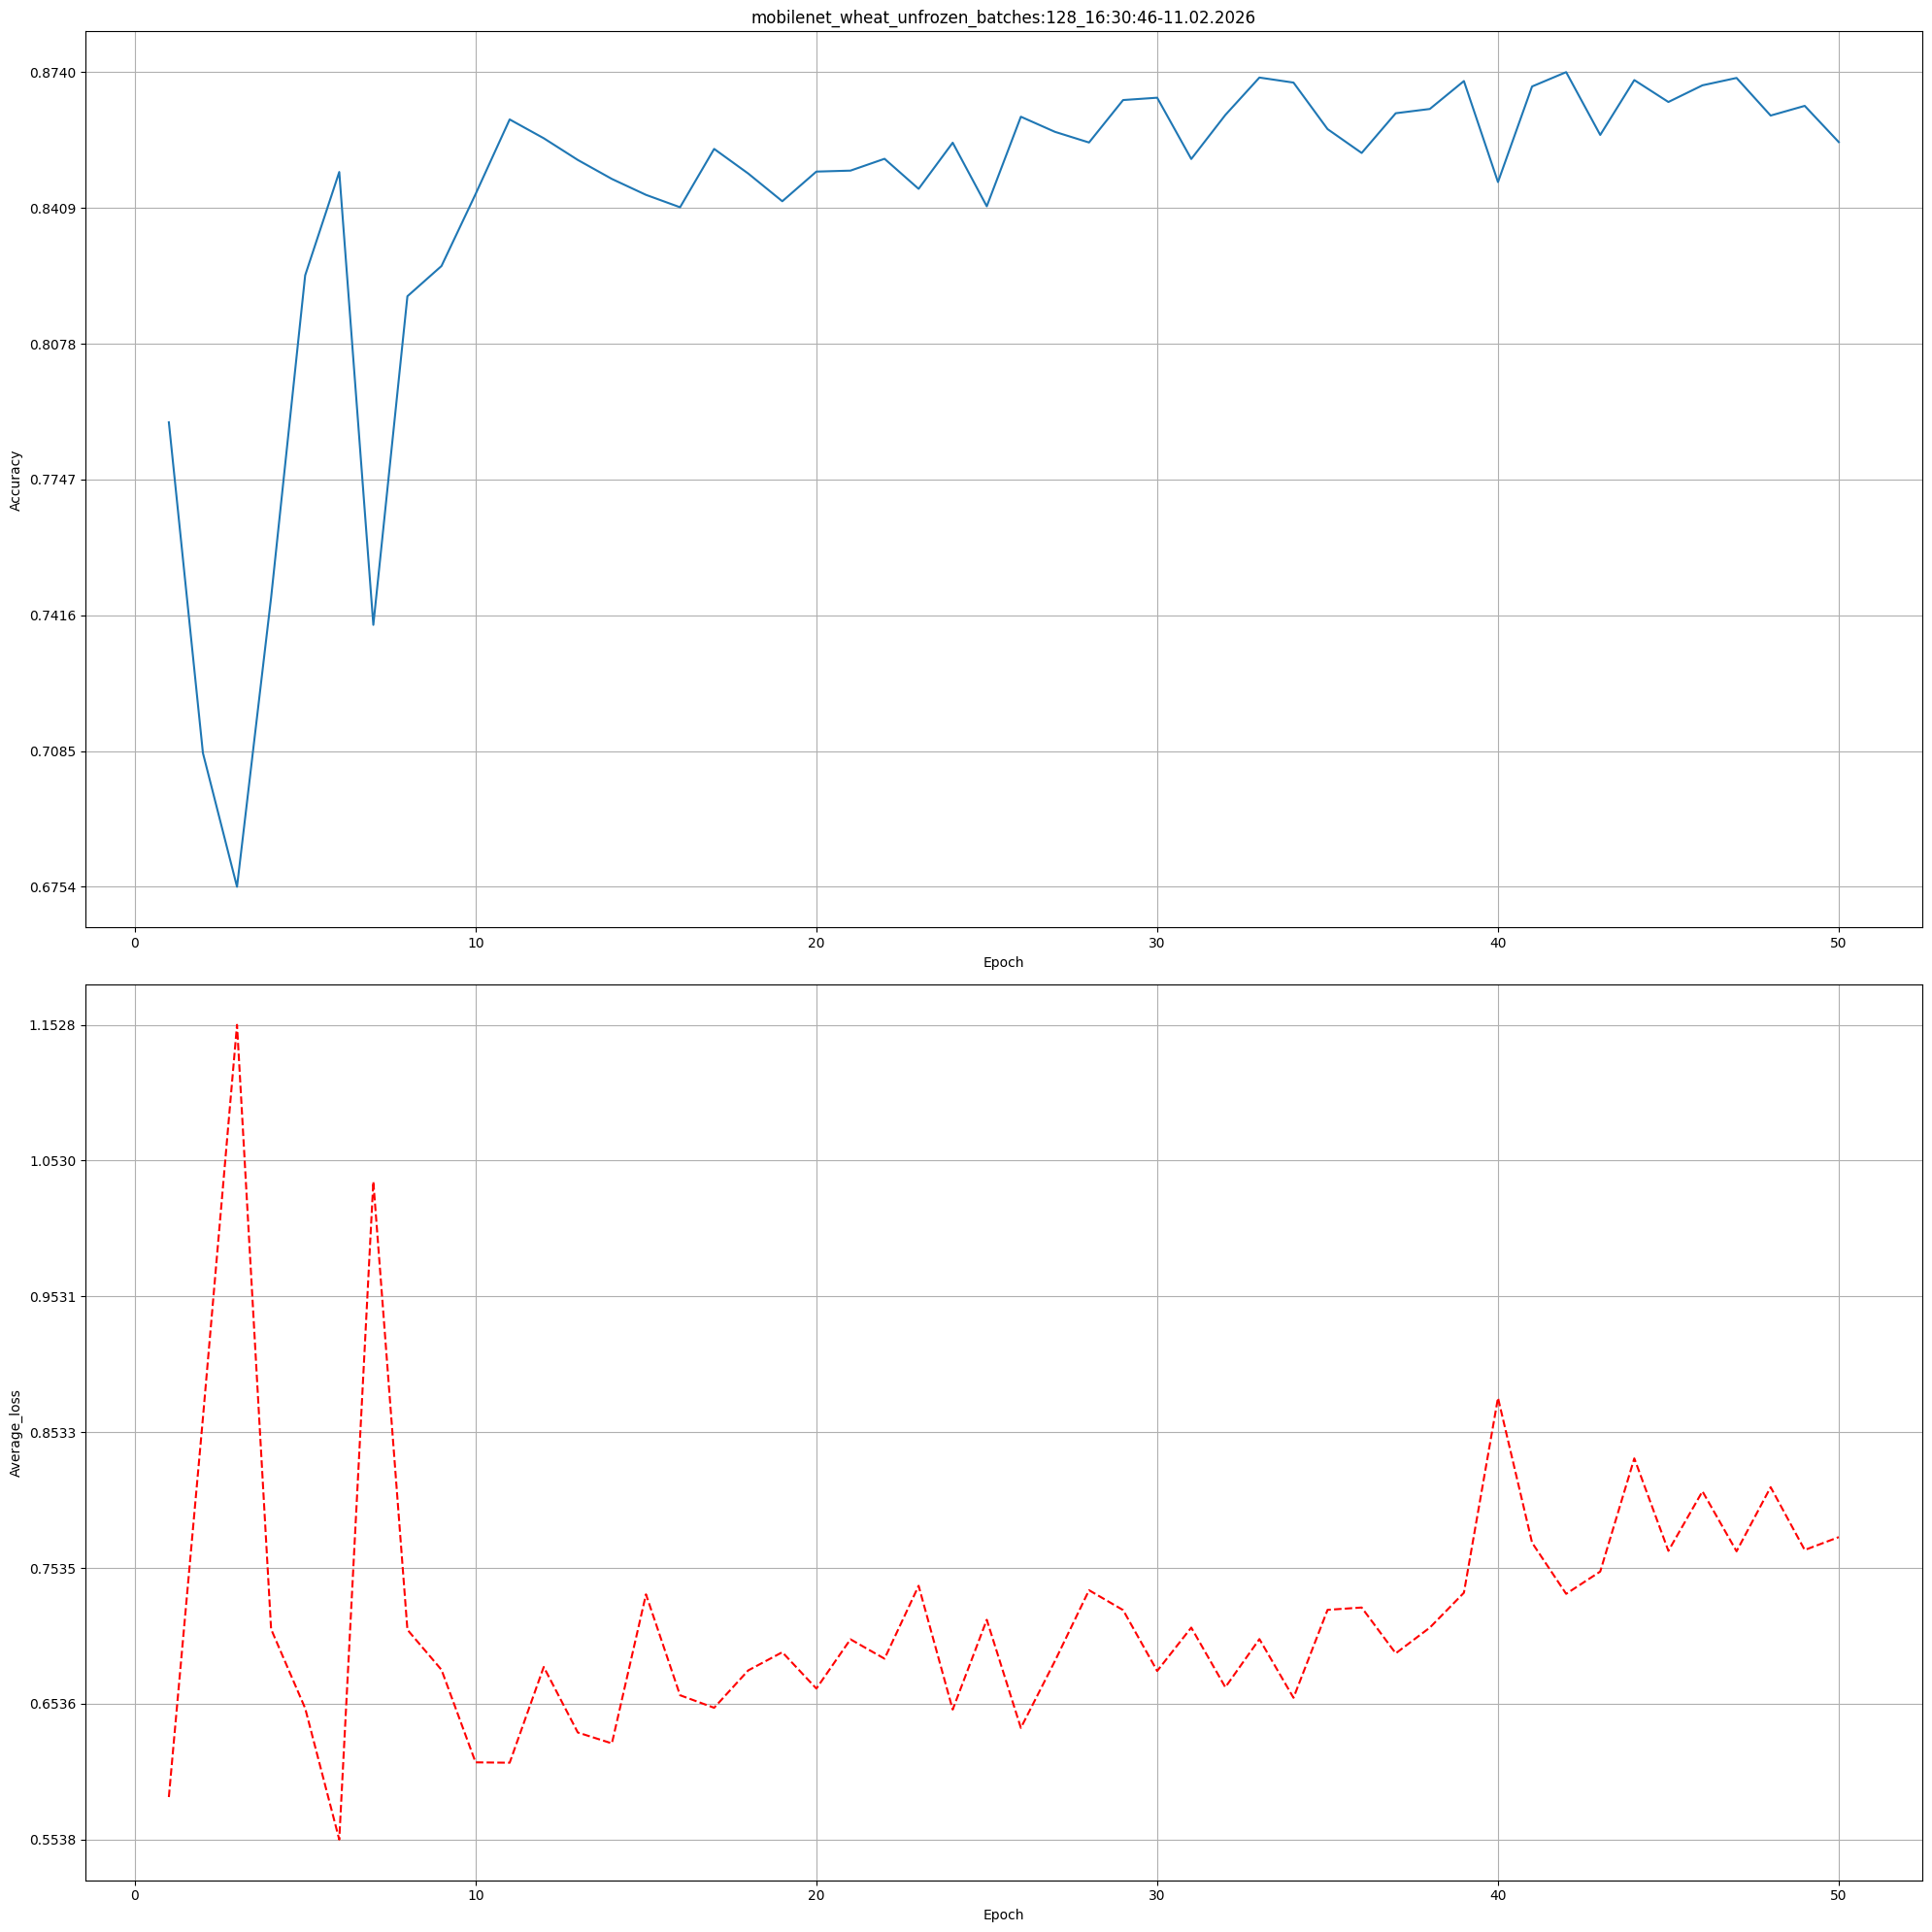

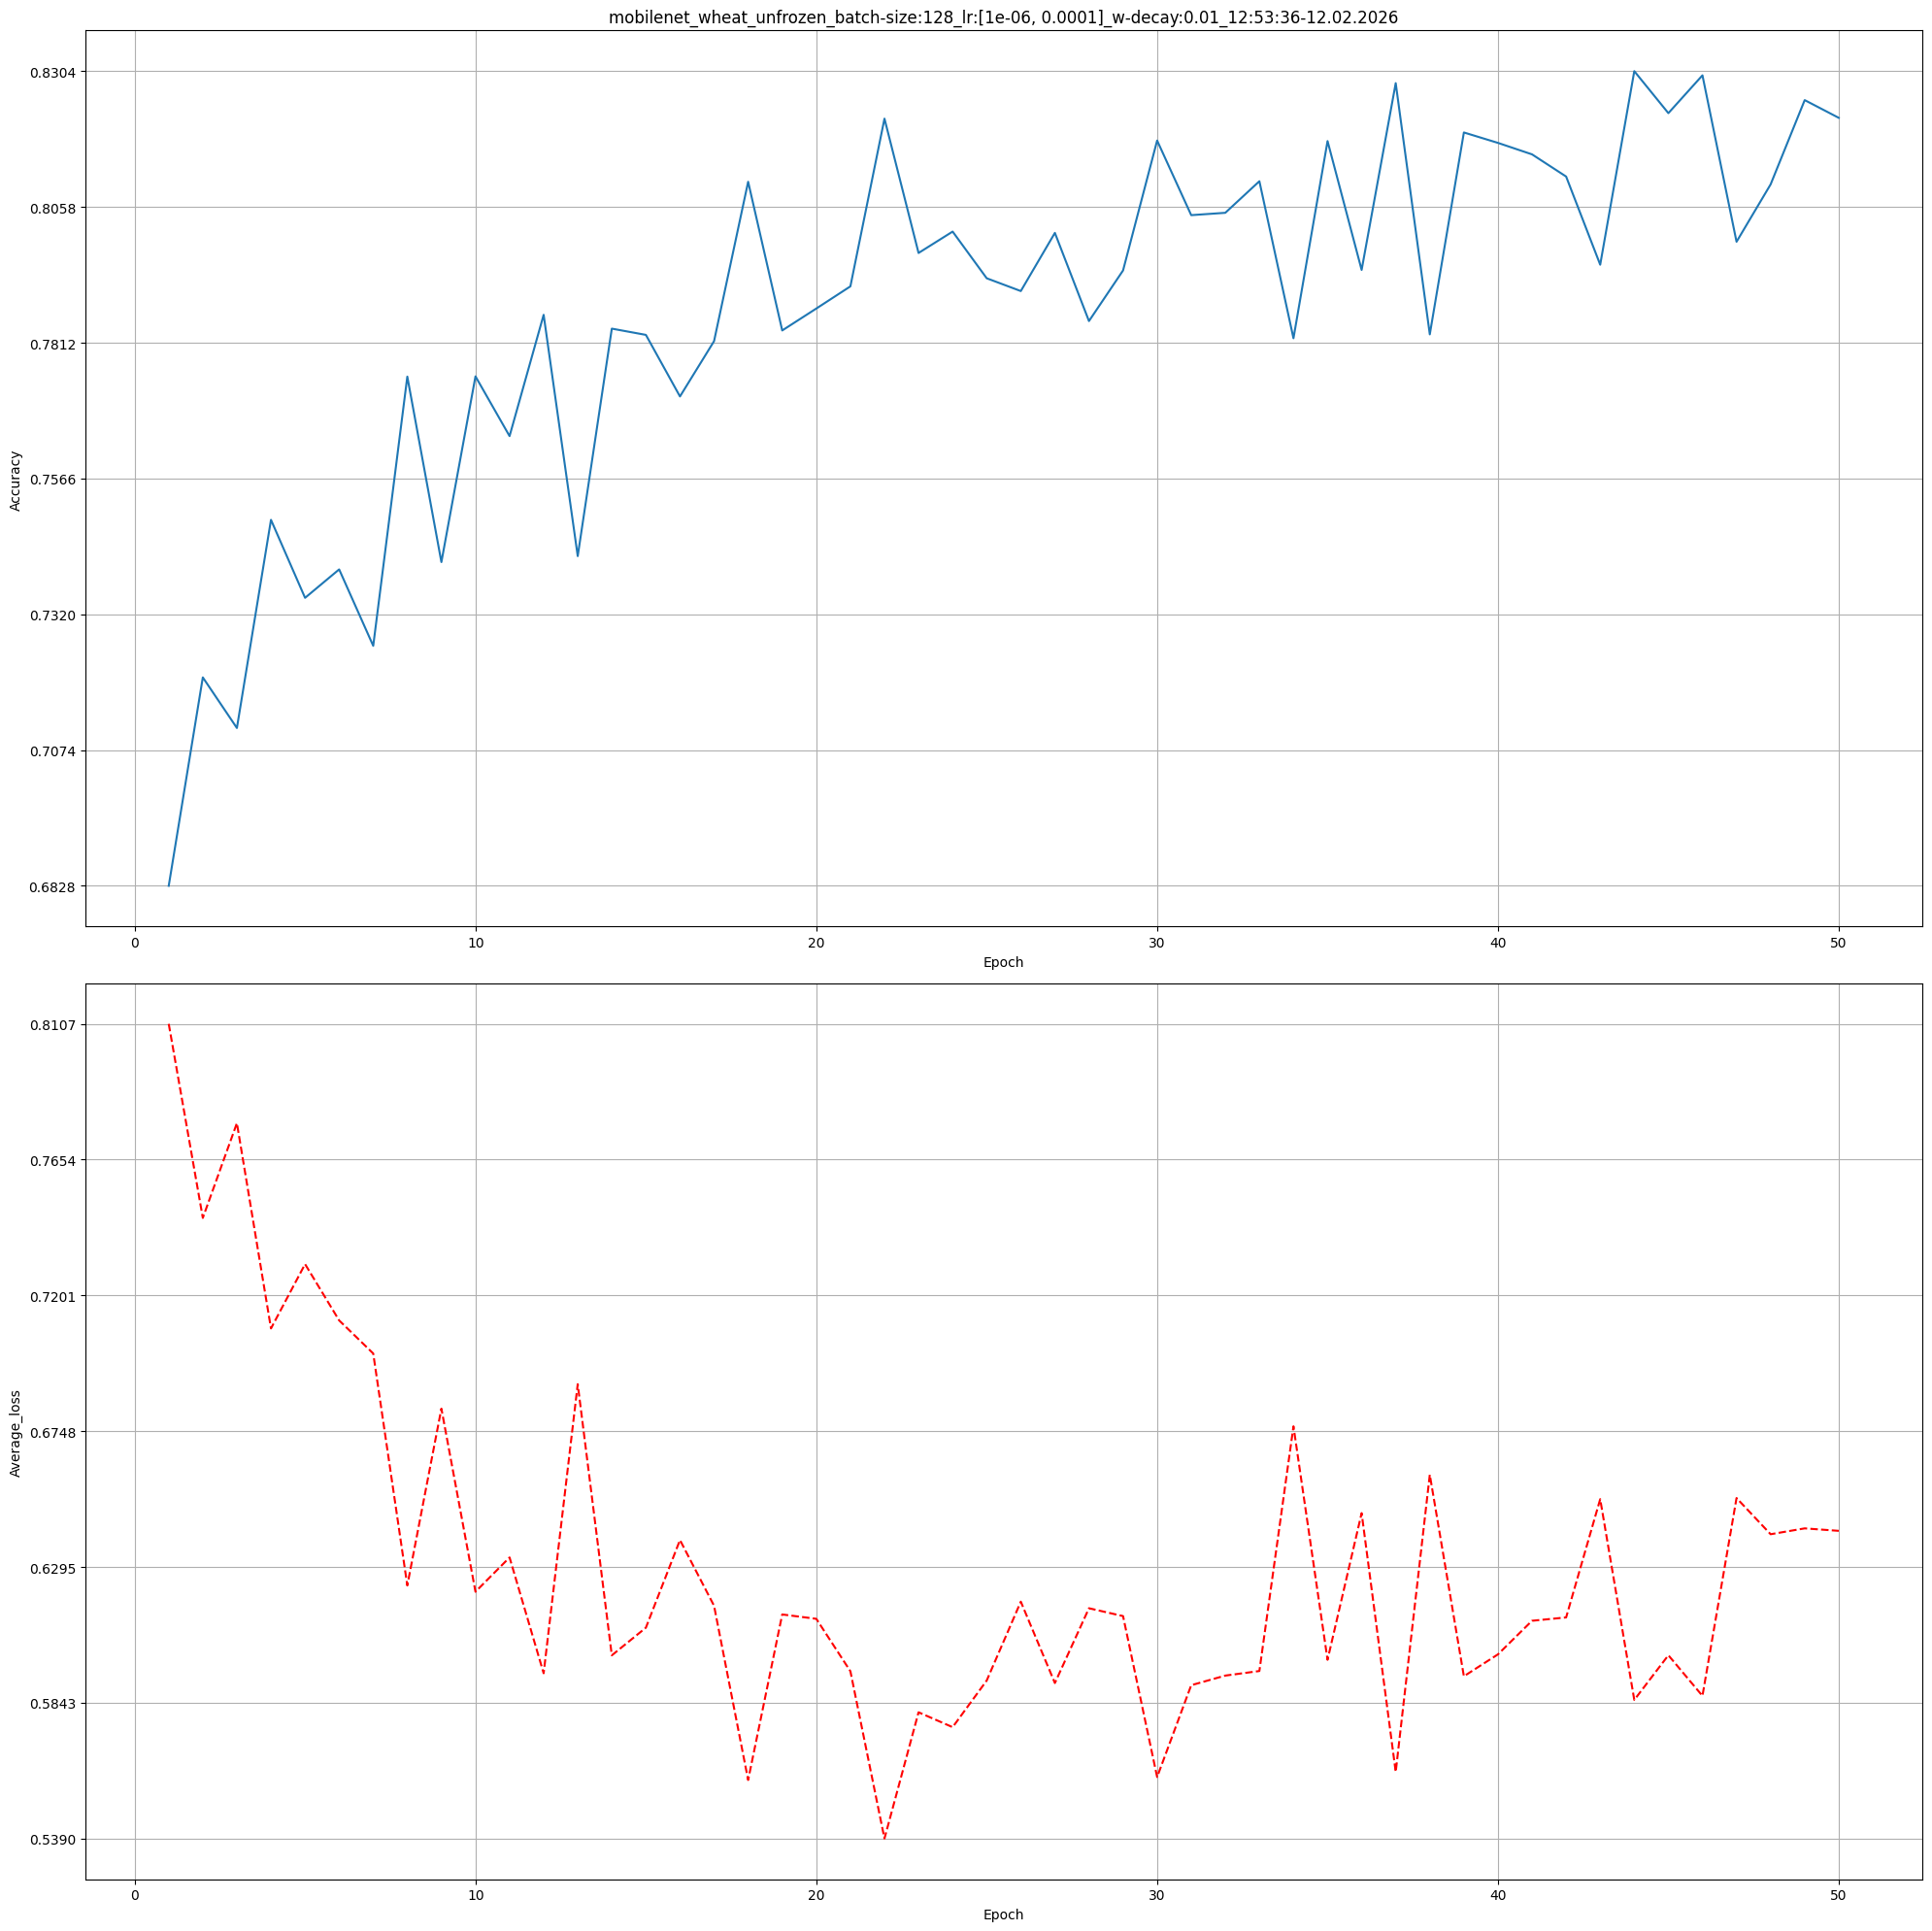

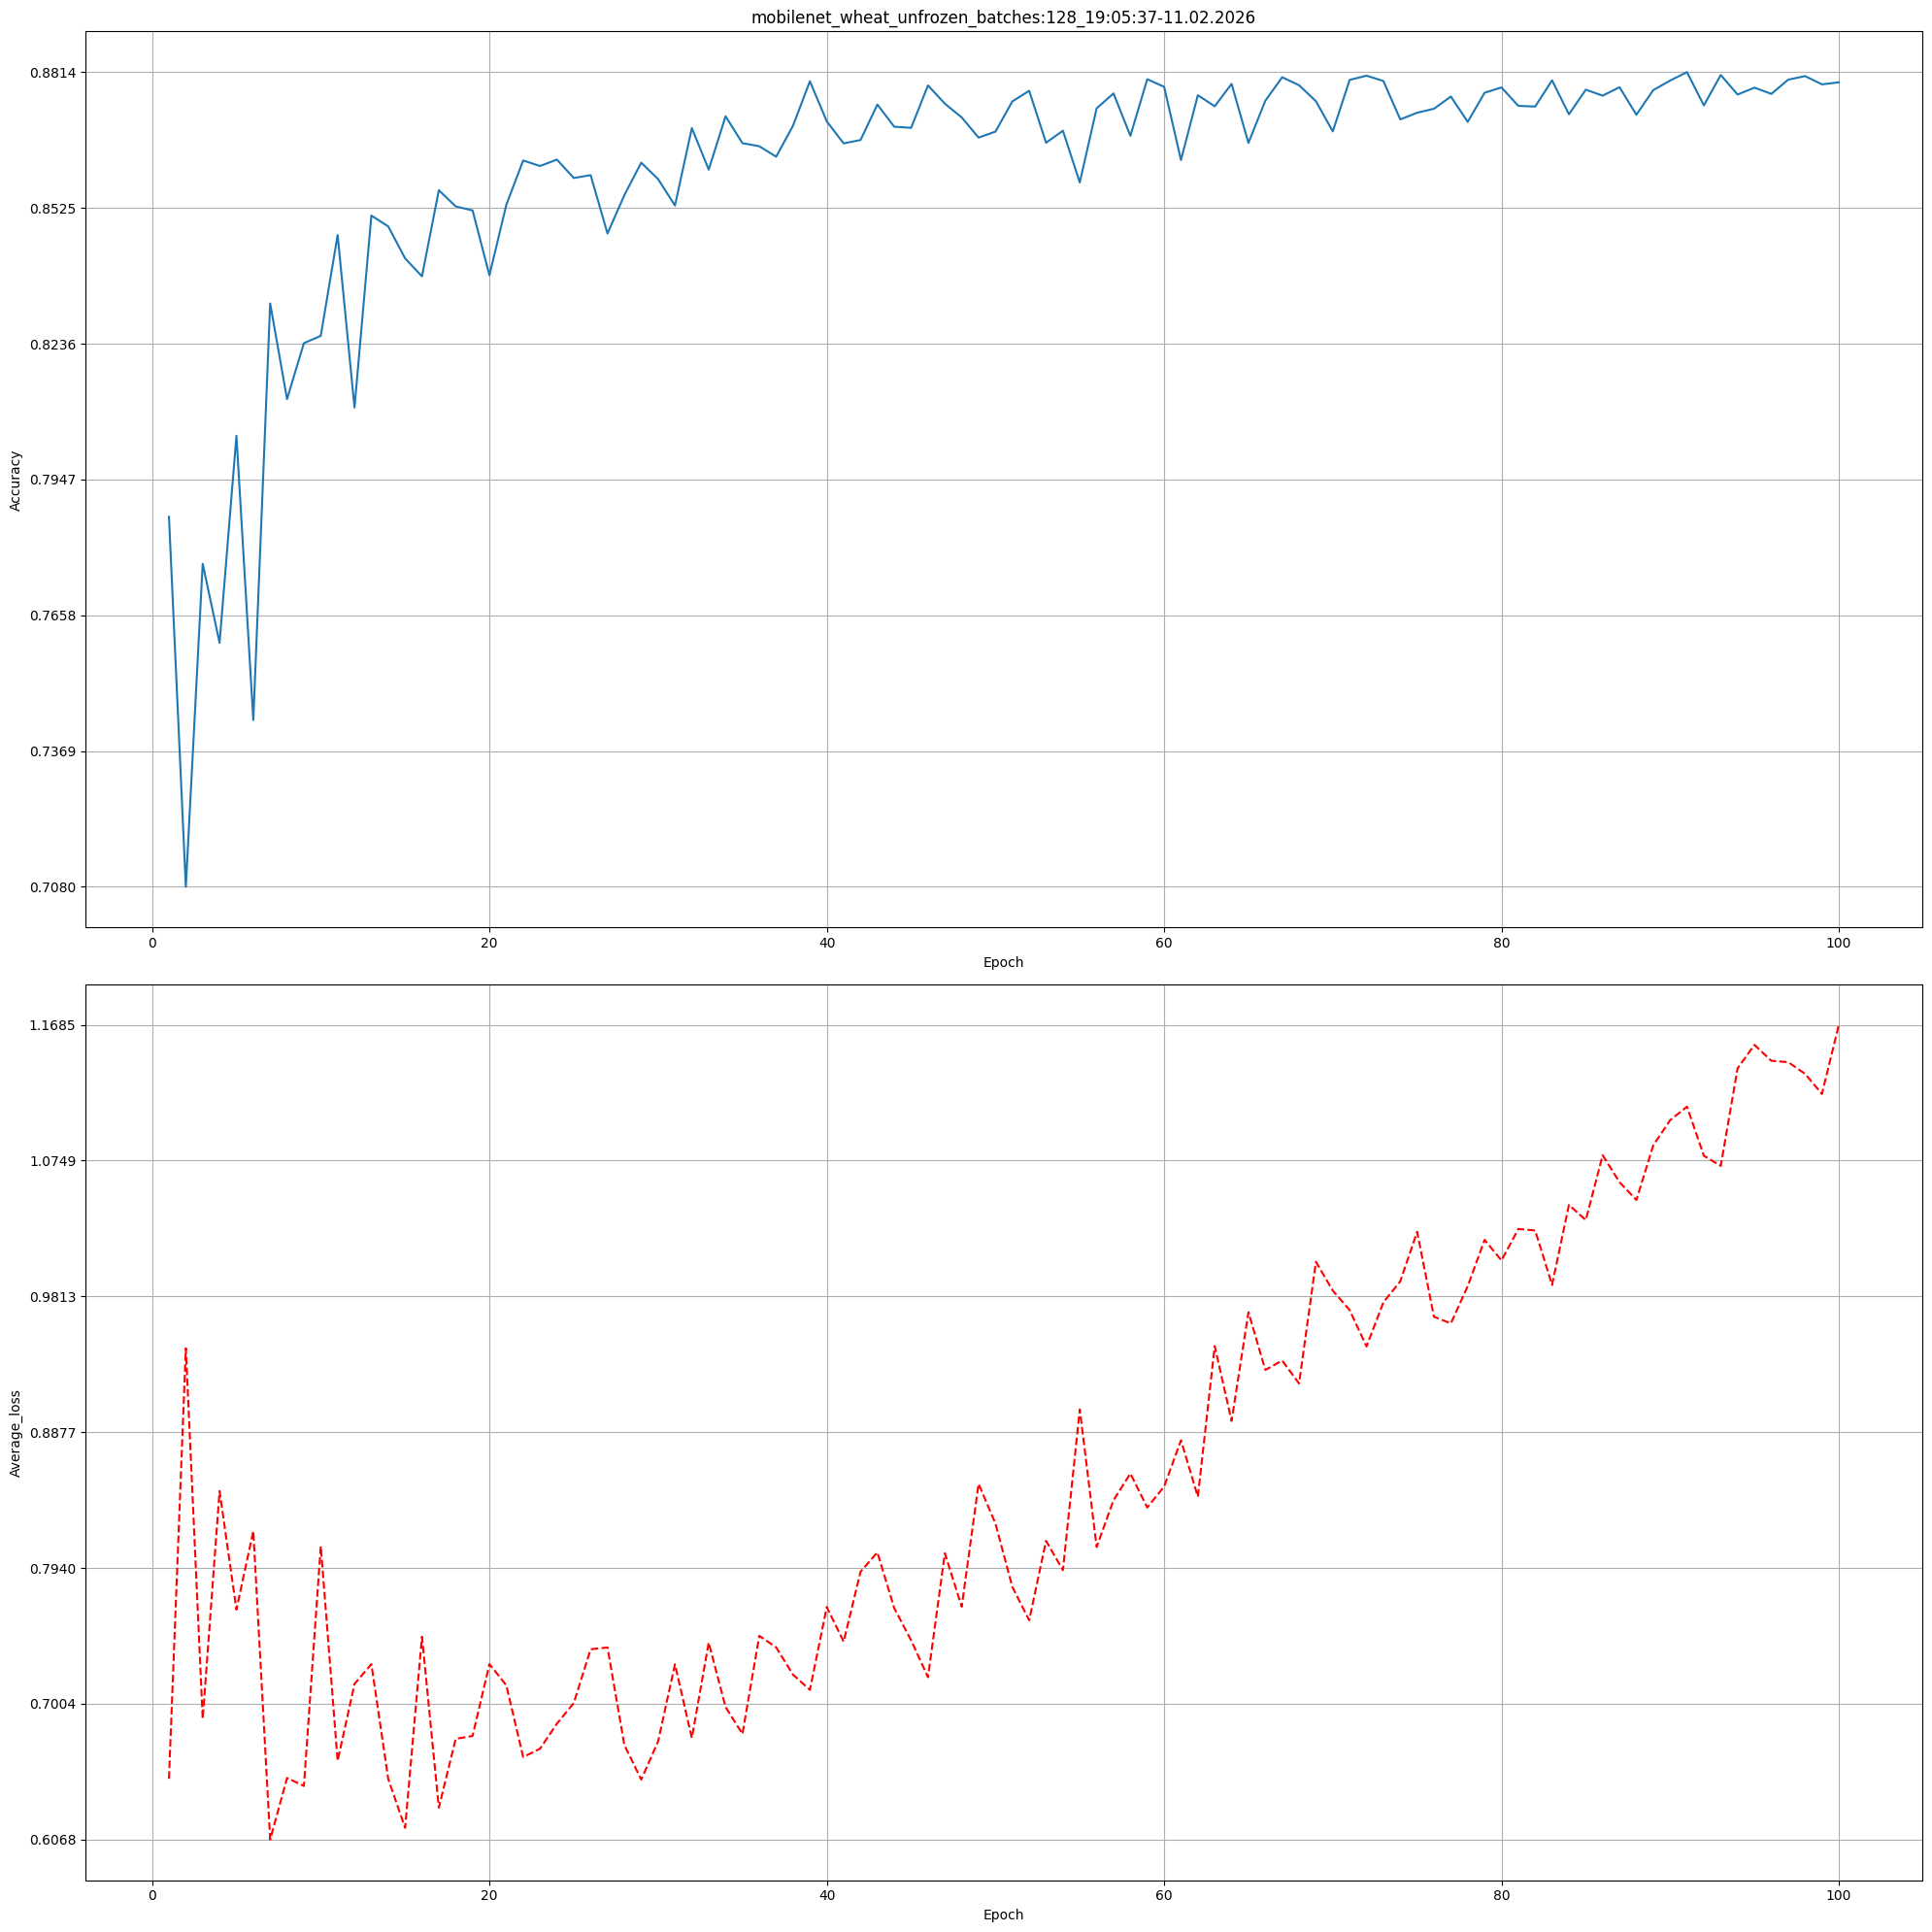

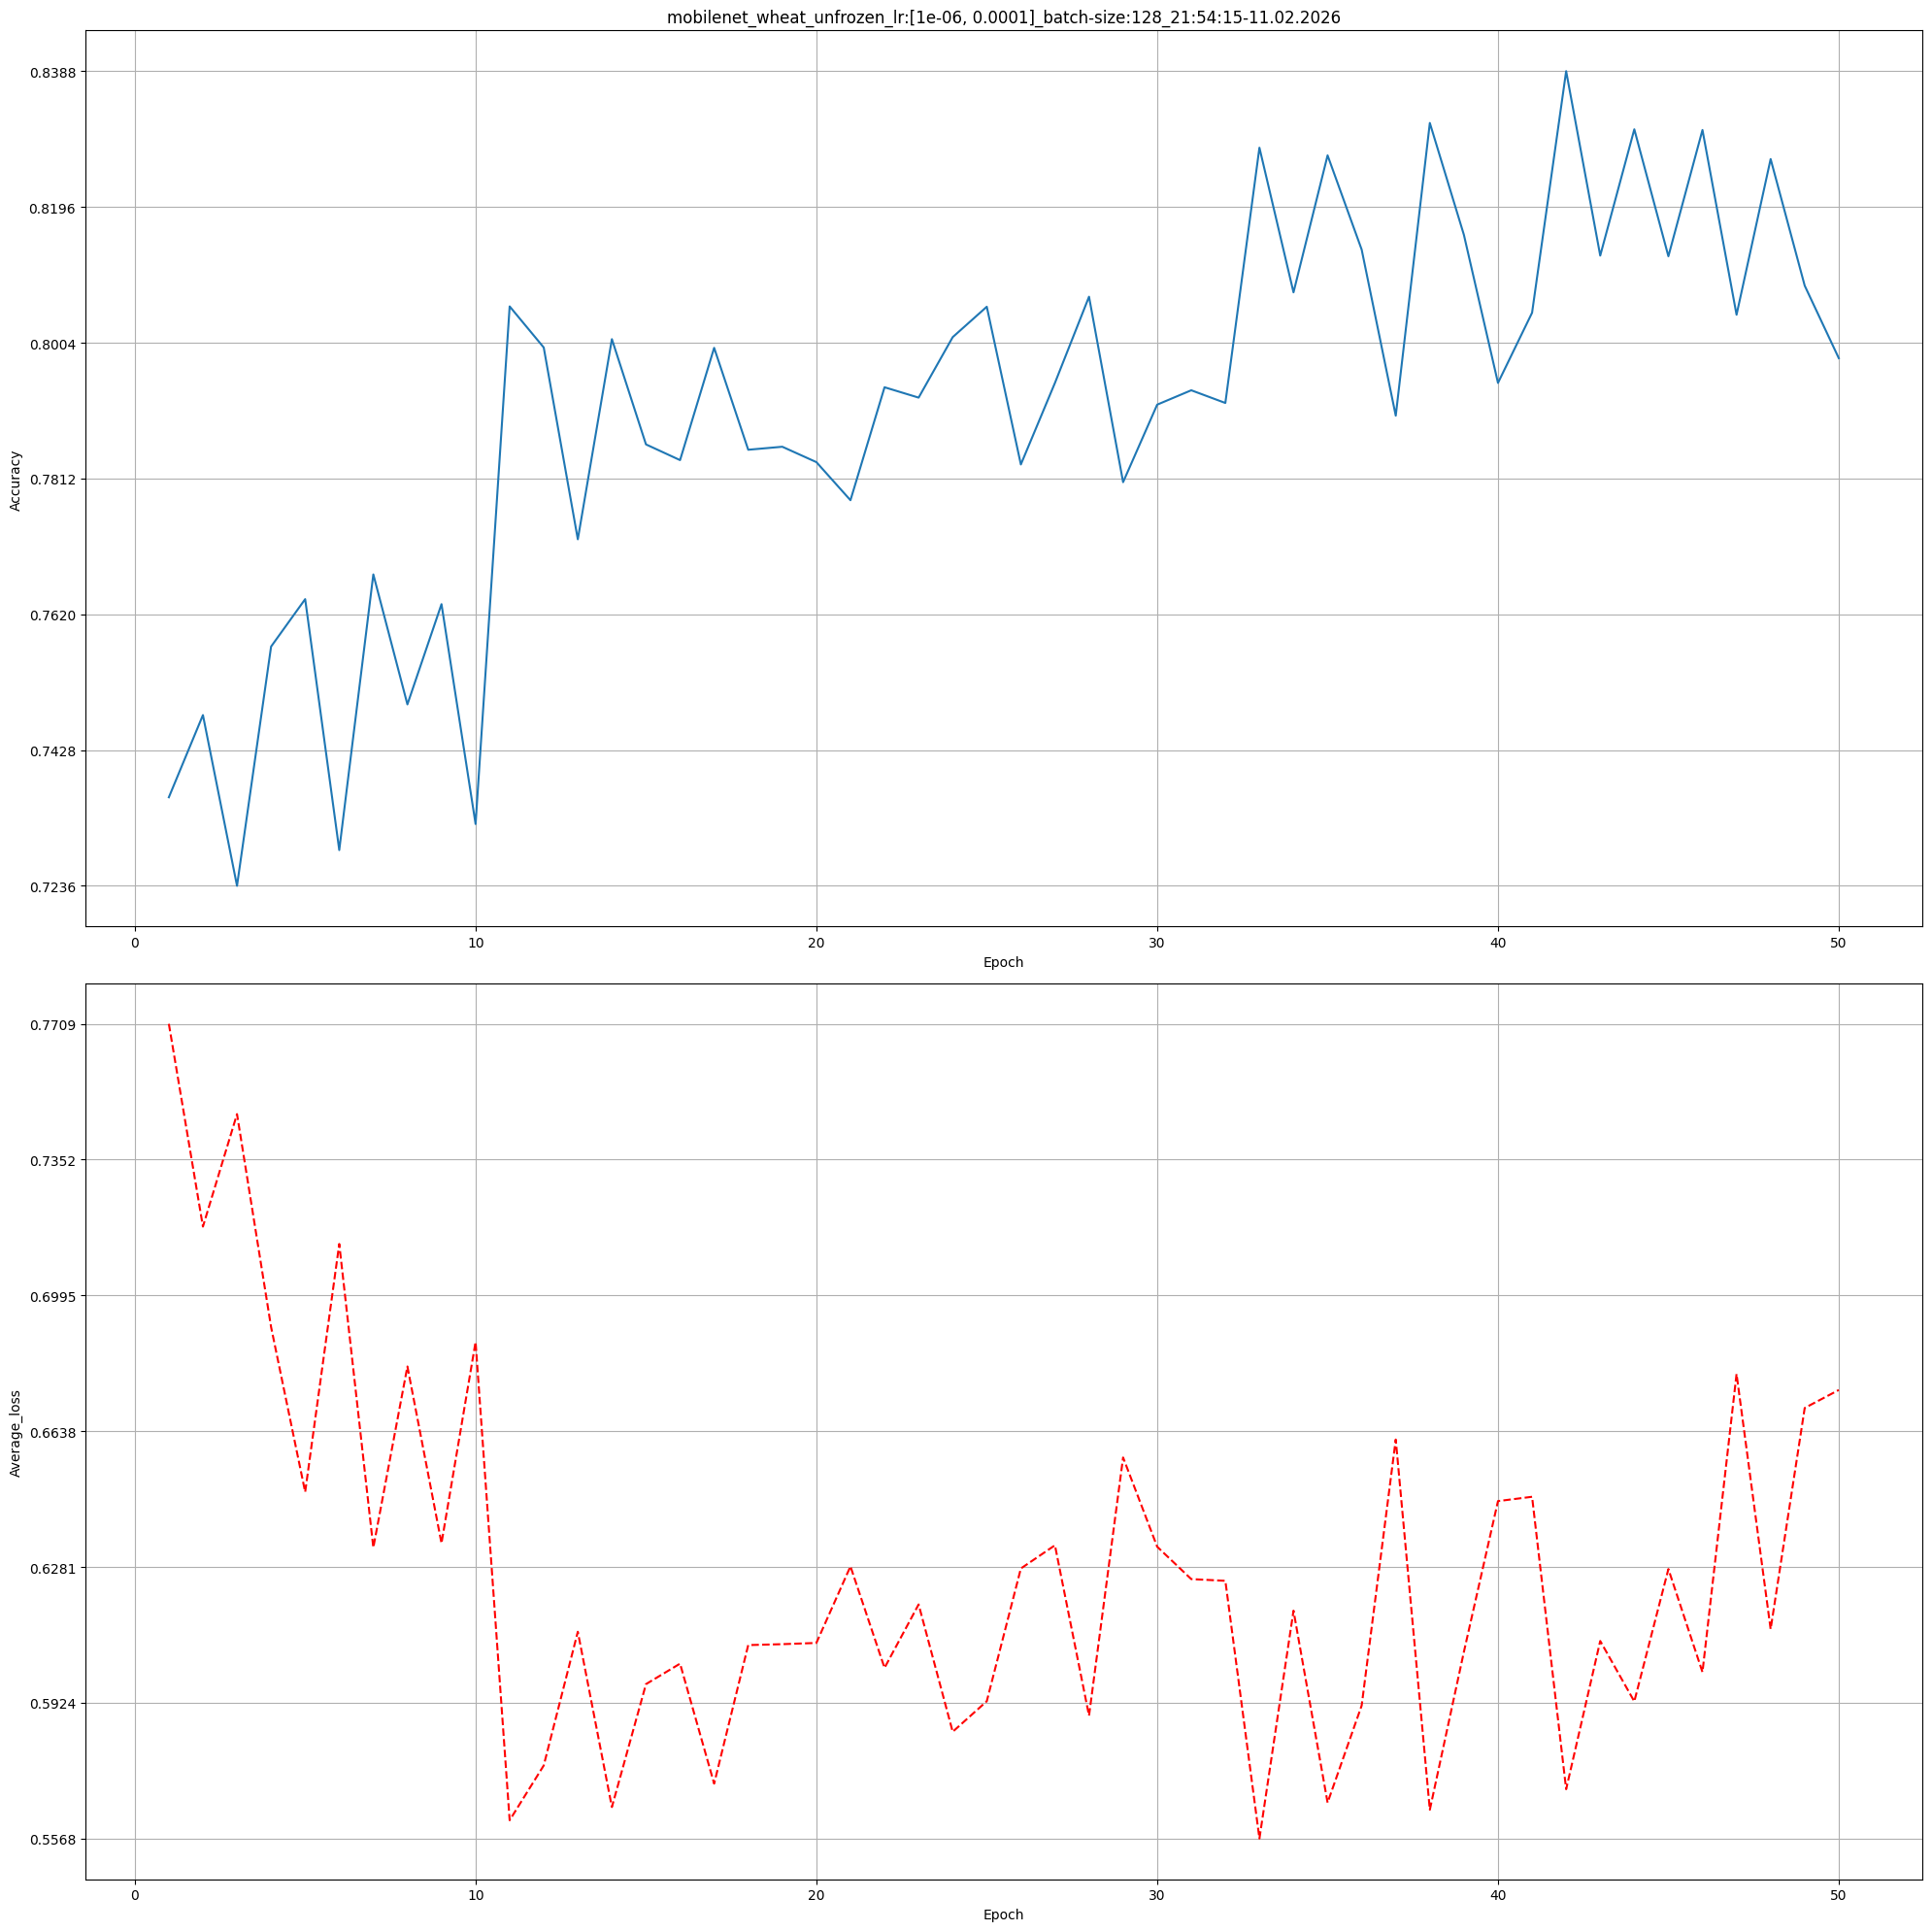

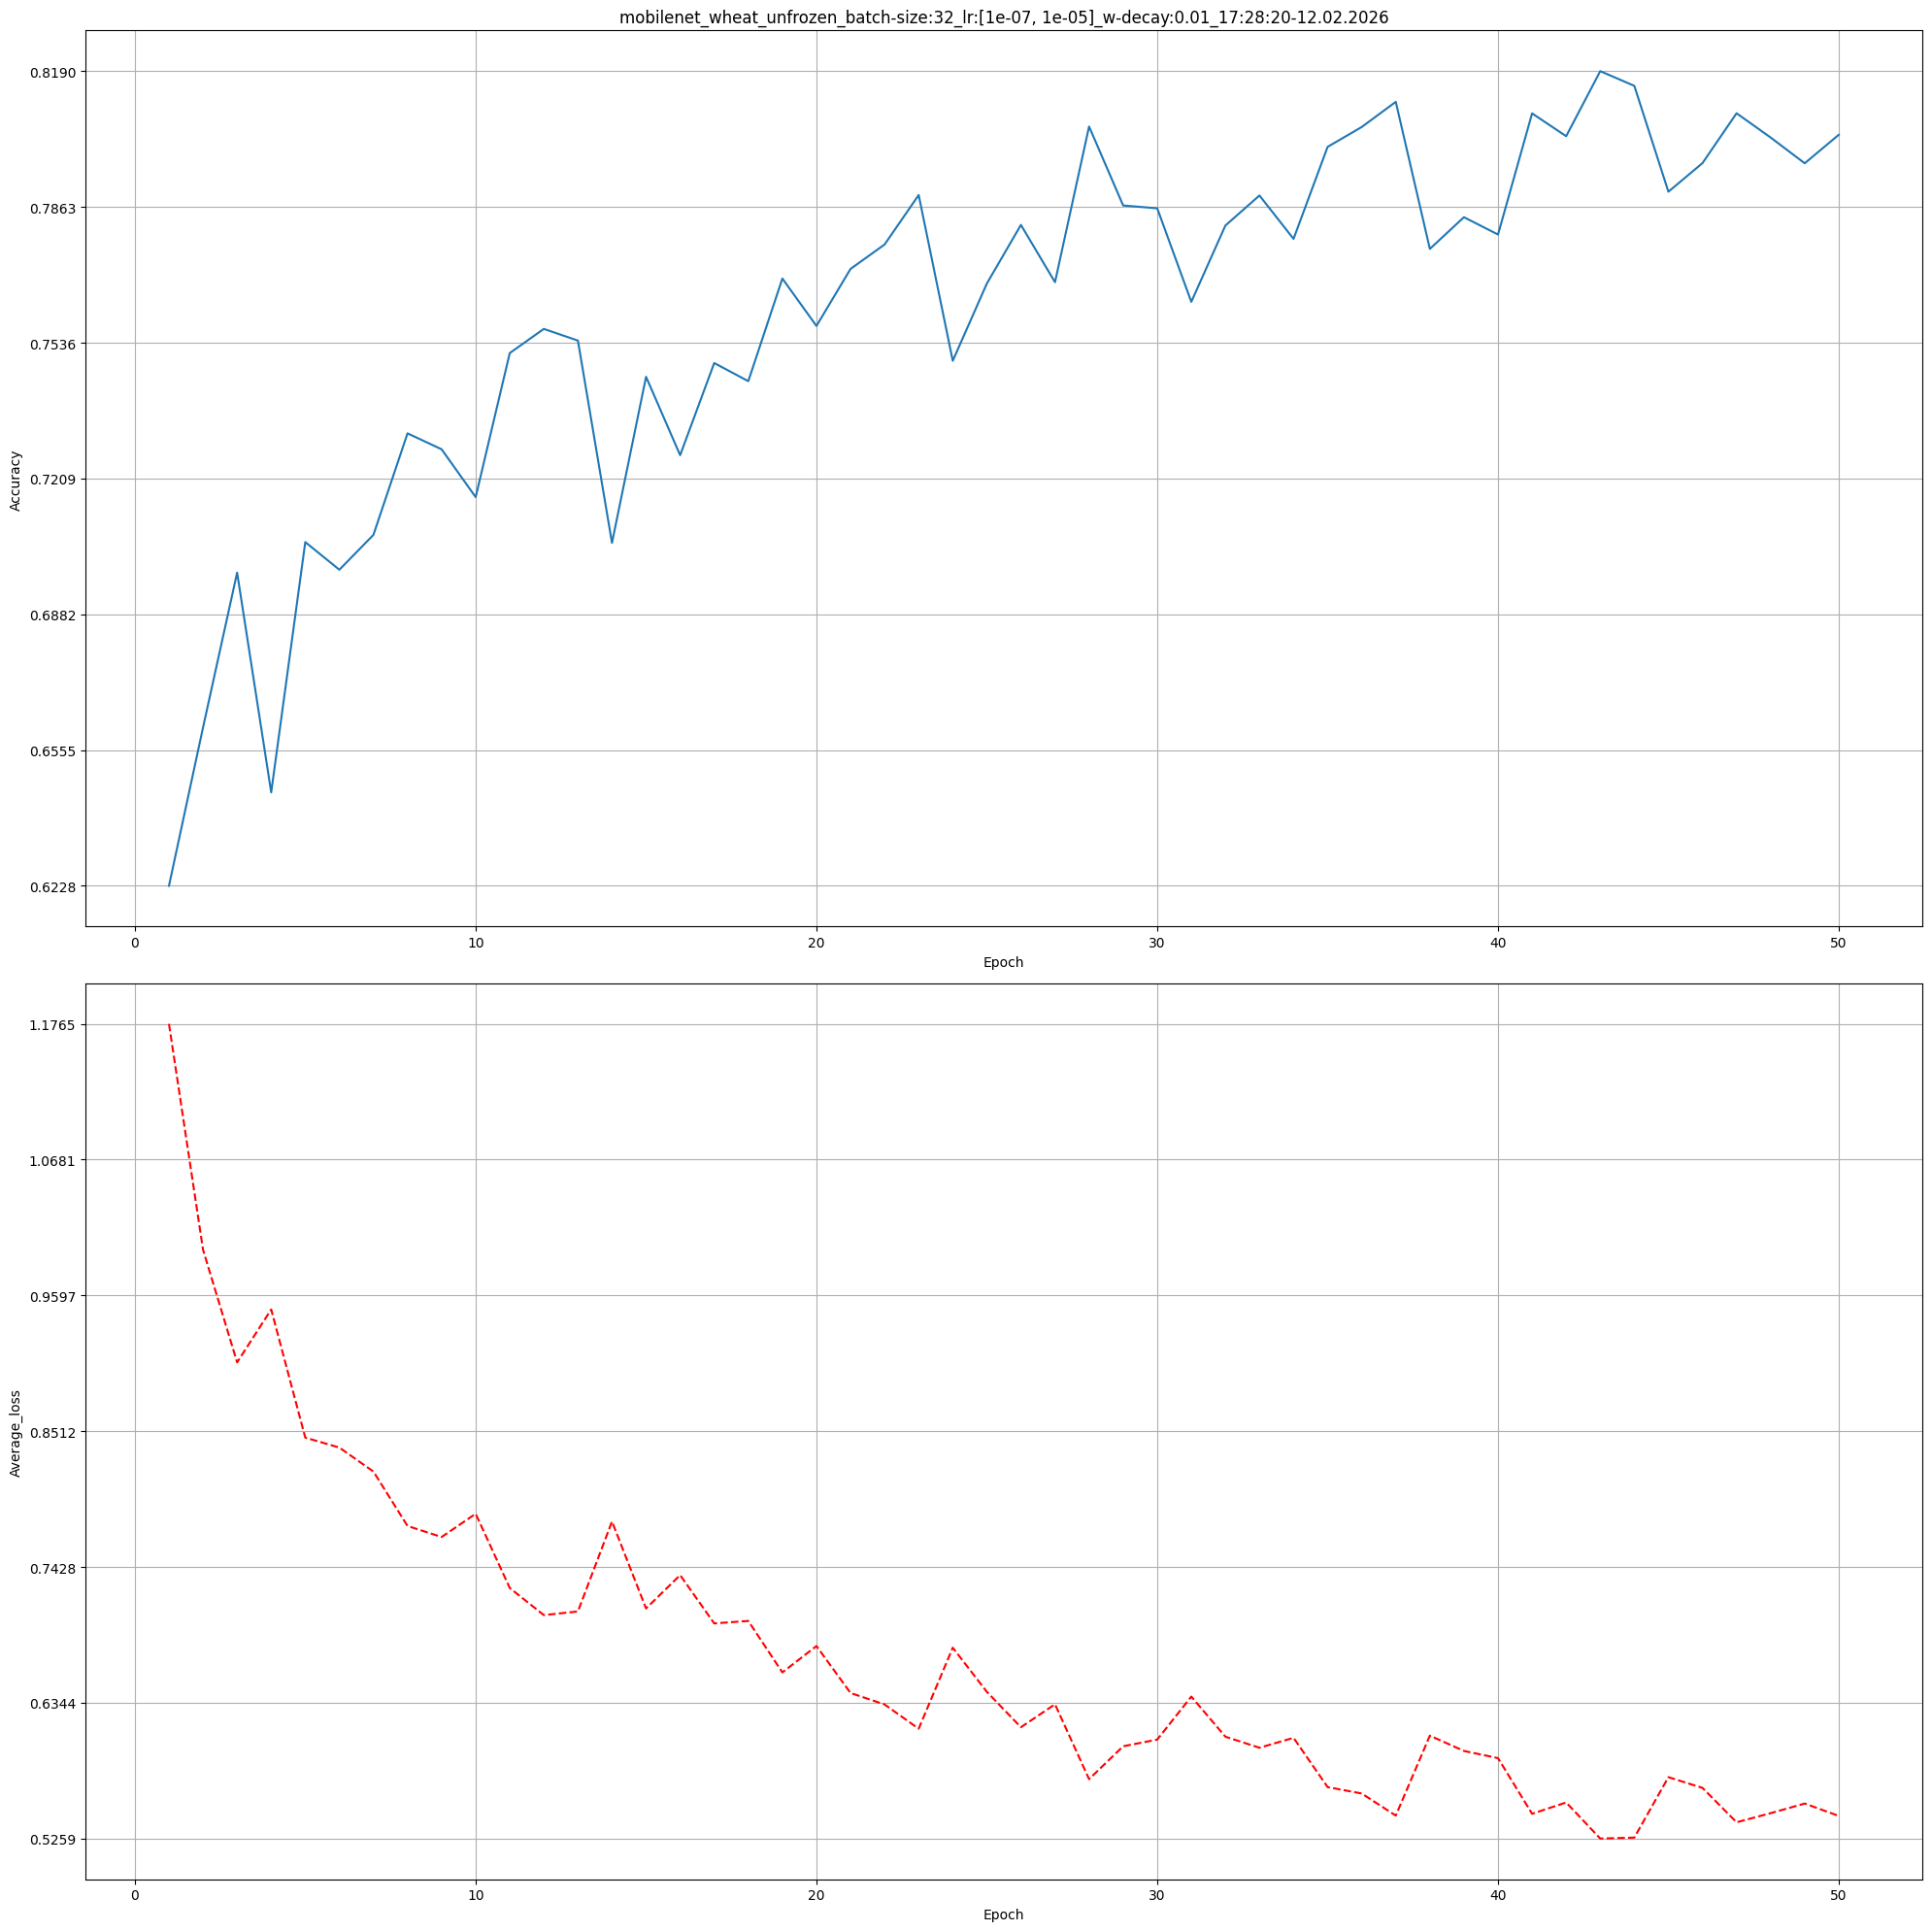

In [3]:

data_folder = 'output_data/'
files = csv_dirs(data_folder)
for f in files:
    title = Path(f).name.strip('.csv')
    df = pd.read_csv(f)
    plot_dataframe(df, title)

In [4]:
models_paths = glob.glob('models/*')
cifar_paths = []
wheat_paths = []
for path in models_paths:
    if 'cifar' in path:
        cifar_paths.append(path)
    if 'wheat' in path:
        wheat_paths.append(path)

Accuracy of the network on the 10000 test images: 91 %
Accuracy for class: airplane is 92.4 %
Accuracy for class: automobile is 95.3 %
Accuracy for class: bird  is 89.2 %
Accuracy for class: cat   is 80.3 %
Accuracy for class: deer  is 91.0 %
Accuracy for class: dog   is 86.7 %
Accuracy for class: frog  is 92.9 %
Accuracy for class: horse is 93.1 %
Accuracy for class: ship  is 94.1 %
Accuracy for class: truck is 94.1 %


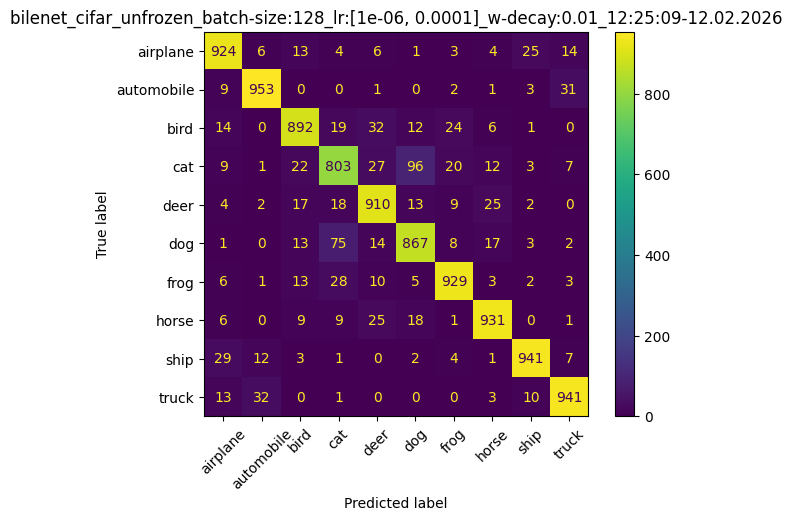

Accuracy of the network on the 10000 test images: 91 %
Accuracy for class: airplane is 92.4 %
Accuracy for class: automobile is 95.8 %
Accuracy for class: bird  is 89.4 %
Accuracy for class: cat   is 81.3 %
Accuracy for class: deer  is 91.1 %
Accuracy for class: dog   is 85.6 %
Accuracy for class: frog  is 93.8 %
Accuracy for class: horse is 93.4 %
Accuracy for class: ship  is 93.4 %
Accuracy for class: truck is 94.2 %


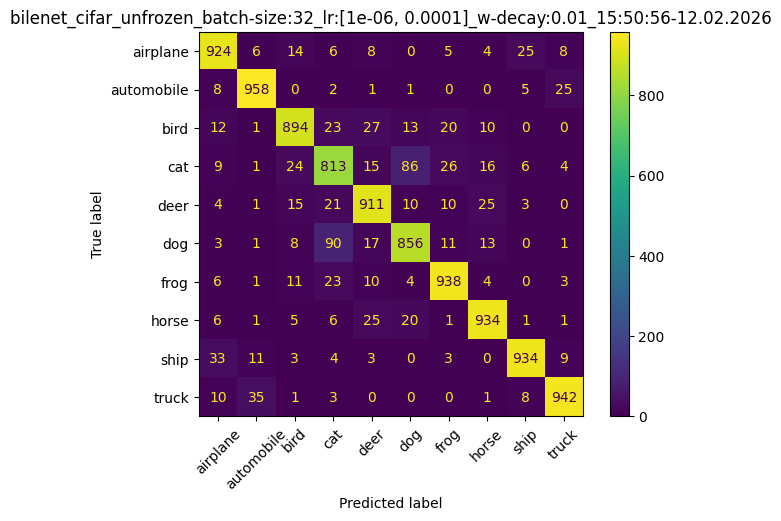

Accuracy of the network on the 10000 test images: 91 %
Accuracy for class: airplane is 90.9 %
Accuracy for class: automobile is 95.0 %
Accuracy for class: bird  is 89.9 %
Accuracy for class: cat   is 81.9 %
Accuracy for class: deer  is 91.1 %
Accuracy for class: dog   is 87.1 %
Accuracy for class: frog  is 94.7 %
Accuracy for class: horse is 93.5 %
Accuracy for class: ship  is 93.8 %
Accuracy for class: truck is 92.9 %


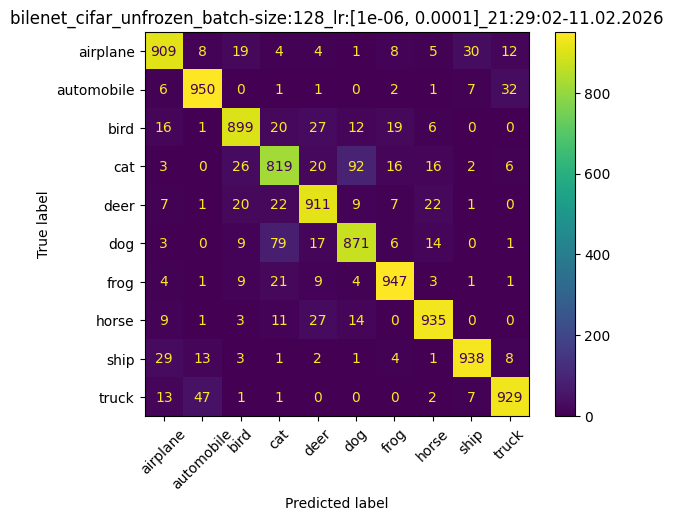

In [5]:
from cifar_data_prep import TESTING_DATA as cifar_data, CLASSES as cifar_classes, data_loader as cifar_loader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cifar_cm_data = []
for path in cifar_paths:
    test_loader = cifar_loader(cifar_data, device, batch_size=get_batch_size(path))
    cifar_trues, cifar_preds = perform_eval(path,cifar_classes,test_loader)
    cifar_cm_data.append((path, cifar_trues, cifar_preds))
    cifar_title = path.strip("models/").strip(".pth")
    confusion_matrix(cifar_title, cifar_trues, cifar_preds, cifar_classes)

models/mobilenet_wheat_unfrozen_batch-size:128_lr:[1e-06, 0.0001]_21:54:15-11.02.2026.pth
Accuracy of the network on the 10000 test images: 68 %
Accuracy for class: Black germ is 81.8 %
Accuracy for class: Broken is 90.3 %
Accuracy for class: Fusarium is 69.3 %
Accuracy for class: Insect is 55.7 %
Accuracy for class: Moldy is 58.0 %
Accuracy for class: Sound is 49.8 %
Accuracy for class: Spotted is 62.6 %
Accuracy for class: Sprouted is 73.2 %


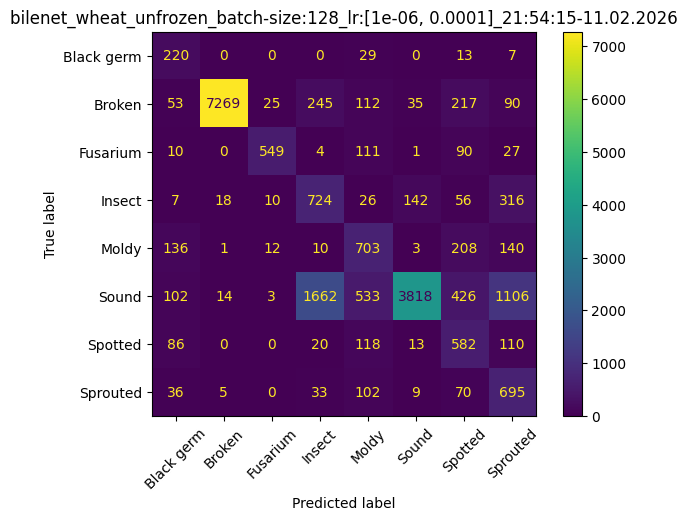

models/mobilenet_wheat_unfrozen_batch-size:128_lr:[1e-06, 0.0001]_w-decay:0.01_12:53:36-12.02.2026.pth
Accuracy of the network on the 10000 test images: 69 %
Accuracy for class: Black germ is 81.4 %
Accuracy for class: Broken is 90.7 %
Accuracy for class: Fusarium is 71.3 %
Accuracy for class: Insect is 42.0 %
Accuracy for class: Moldy is 52.8 %
Accuracy for class: Sound is 54.6 %
Accuracy for class: Spotted is 64.5 %
Accuracy for class: Sprouted is 81.1 %


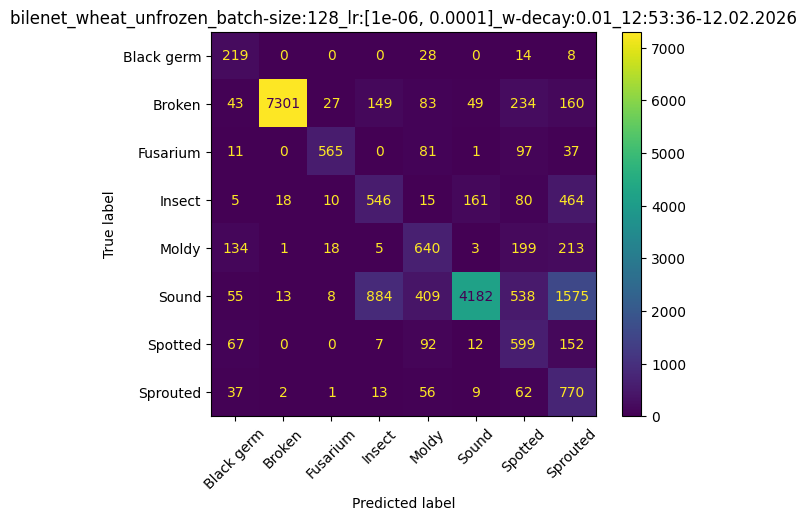

models/mobilenet_wheat_unfrozen_batch-size:526_lr:[1e-06, 0.0001]_w-decay:0.01_18:36:12-12.02.2026.pth
Accuracy of the network on the 10000 test images: 65 %
Accuracy for class: Black germ is 83.6 %
Accuracy for class: Broken is 88.5 %
Accuracy for class: Fusarium is 69.7 %
Accuracy for class: Insect is 43.8 %
Accuracy for class: Moldy is 65.0 %
Accuracy for class: Sound is 44.1 %
Accuracy for class: Spotted is 56.0 %
Accuracy for class: Sprouted is 70.3 %


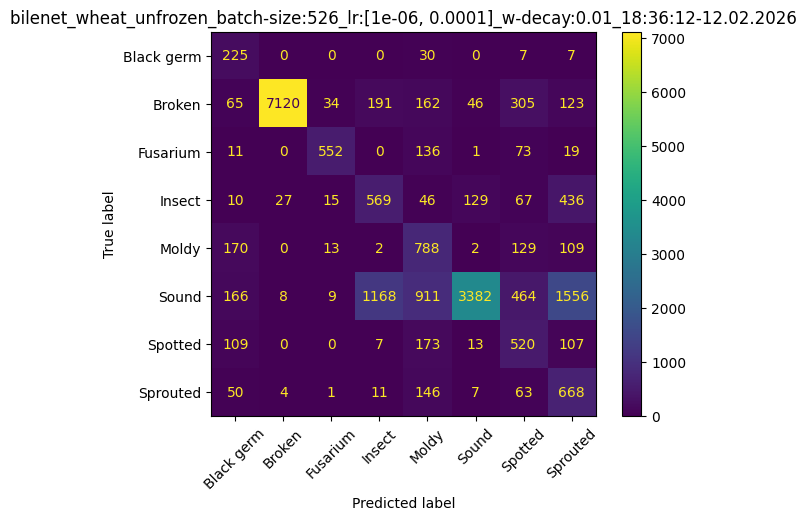

models/mobilenet_wheat_unfrozen_batch-size:32_lr:[1e-07, 1e-05]_w-decay:0.01_17:28:20-12.02.2026.pth
Accuracy of the network on the 10000 test images: 62 %
Accuracy for class: Black germ is 81.8 %
Accuracy for class: Broken is 85.4 %
Accuracy for class: Fusarium is 74.6 %
Accuracy for class: Insect is 46.2 %
Accuracy for class: Moldy is 61.7 %
Accuracy for class: Sound is 39.5 %
Accuracy for class: Spotted is 58.1 %
Accuracy for class: Sprouted is 64.1 %


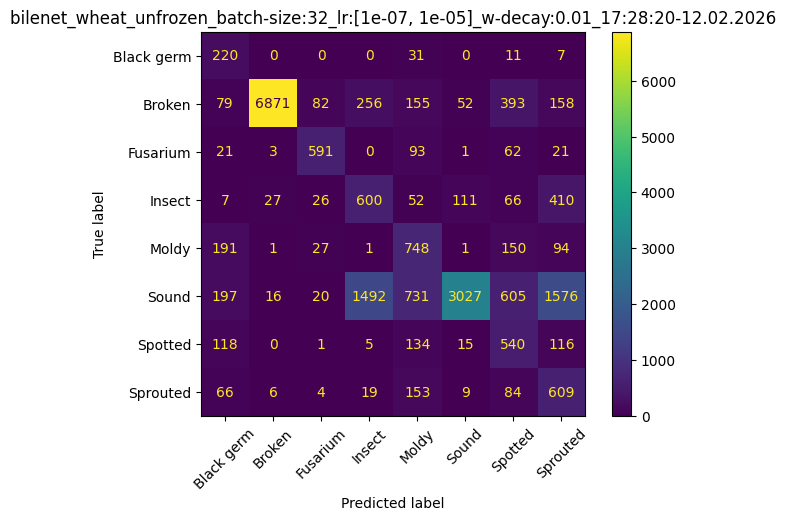

In [11]:
from wheat_data_prep import (
    TESTING_DATA as wheat_data,
    CLASSES as wheat_classes,
    data_loader as wheat_loader,
)

wheat_classes = list(wheat_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

wheat_cm_data = []
for path in wheat_paths:
    print(path)
    test_loader = wheat_loader(wheat_data, device, batch_size=get_batch_size(path), sampler=None)
    wheat_trues, wheat_preds = perform_eval(path, wheat_classes, test_loader)
    wheat_cm_data.append((path, wheat_trues, wheat_preds))
    wheat_title = path.strip("models/").strip(".pth")
    confusion_matrix(wheat_title, wheat_trues, wheat_preds, wheat_classes)